# Import Package

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

import copy
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, f1_score, balanced_accuracy_score, confusion_matrix
import time
from sklearn.metrics import auc
from sklearn.metrics import roc_curve as roc

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Define the file path to your TXT file
file_path = 'CS_data.txt'  # Replace with the actual path to your file

# ask notebook to show all of the column of the data set
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Read the TXT file using pandas, specifying tab as the delimiter
data = pd.read_csv(file_path, sep='\t')

# Display the DataFrame (optional)
data.head() # Display the first few rows to verify the import

ID_CLIENT CLERK_TYPE  PAYMENT_DAY APPLICATION_SUBMISSION_TYPE  \
1          1          C       -99999                           0   
2          2          C       -99999                         Web   
3          3          C       -99999                           0   
4          4          C       -99999                         Web   
5          5          C       -99999                         Web   

   QUANT_ADDITIONAL_CARDS  POSTAL_ADDRESS_TYPE SEX  MARITAL_STATUS  \
1                       0                    1   F               6   
2                       0                    1   F               2   
3                       0                    1   F               2   
4                       0                    1   F               2   
5                       0                    1   M               2   

   QUANT_DEPENDANTS  EDUCATION_LEVEL STATE_OF_BIRTH   CITY_OF_BIRTH  \
1                 1              NaN             RN            Assu   
2                 0              NaN             RJ  rio de janeiro   
3                 0              NaN             RN       GARANHUNS   
4                 0              NaN             PE            CABO   
5                 0              NaN             RJ  RIO DE JANEIRO   

   NATIONALITY RESIDENCIAL_STATE  RESIDENCIAL_CITY  RESIDENCIAL_BOROUGH  \
1            1                RN  Santana do Matos               Centro   
2            1                RJ    RIO DE JANEIRO         CAMPO GRANDE   
3            1                RN        Parnamirim        Boa Esperanca   
4            1                PE              CABO  PONTE DOS CARVALHOS   
5            1                RJ    Rio de Janeiro           Santa Cruz   

  FLAG_RESIDENCIAL_PHONE  RESIDENCIAL_PHONE_AREA_CODE  RESIDENCE_TYPE  \
1                      Y                        105.0             1.0   
2                      Y                         20.0             1.0   
3                      Y                        105.0             1.0   
4                      N                          NaN             NaN   
5                      Y                         20.0             1.0   

   MONTHS_IN_RESIDENCE FLAG_MOBILE_PHONE  FLAG_EMAIL  PERSONAL_MONTHLY_INCOME  \
1                 15.0                 N           1                    900.0   
2                  1.0                 N           1                    750.0   
3                  NaN                 N           1                    500.0   
4                  NaN                 N           1                    500.0   
5                 12.0                 N           1                   1200.0   

   OTHER_INCOMES  FLAG_VISA  FLAG_MASTERCARD  FLAG_DINERS  \
1            0.0          1                1            0   
2            0.0          0                0            0   
3            0.0          0                0            0   
4            0.0          0                0            0   
5            0.0          0                0            0   

   FLAG_AMERICAN_EXPRESS  FLAG_OTHER_CARDS  QUANT_BANKING_ACCOUNTS  \
1                      0                 0                       0   
2                      0                 0                       0   
3                      0                 0                       0   
4                      0                 0                       0   
5                      0                 0                       0   

   QUANT_SPECIAL_BANKING_ACCOUNTS  PERSONAL_ASSETS_VALUE  QUANT_CARS COMPANY  \
1                               0                    0.0           0       N   
2                               0                    0.0           0       Y   
3                               0                    0.0           0       N   
4                               0                    0.0           0       N   
5                               0                    0.0           0       N   

  PROFESSIONAL_STATE PROFESSIONAL_CITY PROFESSIONAL_BOROUGH  \
1                                  Na

# MISSING VALUE SUMMARY

In [3]:
# Create a DataFrame to store missing value information
missing_data = pd.DataFrame(data.isnull().sum(), columns=['Missing_Values'])

# Calculate the percentage of missing values
missing_data['Percentage_Missing'] = (missing_data['Missing_Values'] / len(data)) * 100

# Filter predictors with missing values greater than 0
missing_data = missing_data[missing_data['Missing_Values'] > 0]

# Sort the DataFrame by the percentage of missing values in descending order
missing_data = missing_data.sort_values(by='Percentage_Missing', ascending=False)

# Display the summary table
print(missing_data)

                              Missing_Values  Percentage_Missing
EDUCATION_LEVEL                        49174              98.348
PROFESSIONAL_PHONE_AREA_CODE           36532              73.064
PROFESSIONAL_CITY                      33783              67.566
PROFESSIONAL_BOROUGH                   33783              67.566
EDUCATION_LEVEL.1                      32338              64.676
MATE_PROFESSION_CODE                   28884              57.768
RESIDENCIAL_PHONE_AREA_CODE             8212              16.424
PROFESSION_CODE                         7756              15.512
OCCUPATION_TYPE                         7313              14.626
MONTHS_IN_RESIDENCE                     3777               7.554
RESIDENCE_TYPE                          1349               2.698


# Variable Pre-selection

In [4]:
predictor_use = ['PAYMENT_DAY','QUANT_DEPENDANTS','CITY_OF_BIRTH','RESIDENCIAL_STATE',
                'RESIDENCIAL_BOROUGH','FLAG_RESIDENCIAL_PHONE','MONTHS_IN_RESIDENCE',
                'FLAG_MOBILE_PHONE','PERSONAL_MONTHLY_INCOME','OTHER_INCOMES','QUANT_BANKING_ACCOUNTS','QUANT_SPECIAL_BANKING_ACCOUNTS',
                'PERSONAL_ASSETS_VALUE','QUANT_CARS','COMPANY','FLAG_PROFESSIONAL_PHONE','MONTHS_IN_THE_JOB',
                'FLAG_ACSP_RECORD','AGE', 'APPLICATION_SUBMISSION_TYPE','POSTAL_ADDRESS_TYPE',
                 'FLAG_EMAIL','FLAG_VISA', 'NATIONALITY', 'FLAG_MASTERCARD','FLAG_DINERS','FLAG_AMERICAN_EXPRESS',
                 'MARITAL_STATUS','TARGET_LABEL_BAD.1']

In [5]:
data = data[predictor_use]
data.head()

PAYMENT_DAY  QUANT_DEPENDANTS   CITY_OF_BIRTH RESIDENCIAL_STATE  \
1       -99999                 1            Assu                RN   
2       -99999                 0  rio de janeiro                RJ   
3       -99999                 0       GARANHUNS                RN   
4       -99999                 0            CABO                PE   
5       -99999                 0  RIO DE JANEIRO                RJ   

   RESIDENCIAL_BOROUGH FLAG_RESIDENCIAL_PHONE  MONTHS_IN_RESIDENCE  \
1               Centro                      Y                 15.0   
2         CAMPO GRANDE                      Y                  1.0   
3        Boa Esperanca                      Y                  NaN   
4  PONTE DOS CARVALHOS                      N                  NaN   
5           Santa Cruz                      Y                 12.0   

  FLAG_MOBILE_PHONE  PERSONAL_MONTHLY_INCOME  OTHER_INCOMES  \
1                 N                    900.0            0.0   
2                 N                    750.0            0.0   
3                 N                    500.0            0.0   
4                 N                    500.0            0.0   
5                 N                   1200.0            0.0   

   QUANT_BANKING_ACCOUNTS  QUANT_SPECIAL_BANKING_ACCOUNTS  \
1                       0                               0   
2                       0                               0   
3                       0                               0   
4                       0                               0   
5                       0                               0   

   PERSONAL_ASSETS_VALUE  QUANT_CARS COMPANY FLAG_PROFESSIONAL_PHONE  \
1                    0.0           0       N                       N   
2                    0.0           0       Y                       N   
3                    0.0           0       N                       N   
4                    0.0           0       N                       N   
5                    0.0           0       N                       N   

   MONTHS_IN_THE_JOB FLAG_ACSP_RECORD  AGE APPLICATION_SUBMISSION_TYPE  \
1                  0                N   32                           0   
2                  0                N   34                         Web   
3                  0                N   27                           0   
4                  0                N   61                         Web   
5                  0                N   48                         Web   

   POSTAL_ADDRESS_TYPE  FLAG_EMAIL  FLAG_VISA  NATIONALITY  FLAG_MASTERCARD  \
1                    1           1          1            1                1   
2                    1           1          0            1                0   
3                    1           1          0            1                0   
4                    1           1          0            1                0   
5                    1           1          0            1                0   

   FLAG_DINERS  FLAG_AMERICAN_EXPRESS  MARITAL_STATUS  TARGET_LABEL_BAD.1  
1            0                      0               6                   1  
2            0                      0               2                   1  
3            0                      0               2                   0  
4            0                      0               2                   0  
5            0                      0               2                   1

In [6]:
data.describe()

PAYMENT_DAY  QUANT_DEPENDANTS  MONTHS_IN_RESIDENCE  \
count  50000.000000      50000.000000         46223.000000   
mean    -167.151640          0.650520             9.727149   
std     4239.371262          1.193655            10.668841   
min   -99999.000000          0.000000             0.000000   
25%       10.000000          0.000000             1.000000   
50%       10.000000          0.000000             6.000000   
75%       15.000000          1.000000            15.000000   
max       25.000000         53.000000           228.000000   

       PERSONAL_MONTHLY_INCOME  OTHER_INCOMES  QUANT_BANKING_ACCOUNTS  \
count             50000.000000   50000.000000            50000.000000   
mean                886.678437      35.434760                0.357840   
std                7846.959327     891.515142                0.479953   
min                  60.000000       0.000000                0.000000   
25%                 360.000000       0.000000                0.000000   
50%                 500.000000       0.000000                0.000000   
75%                 800.000000       0.000000                1.000000   
max              959000.000000  194344.000000                2.000000   

       QUANT_SPECIAL_BANKING_ACCOUNTS  PERSONAL_ASSETS_VALUE    QUANT_CARS  \
count                    50000.000000           5.000000e+04  50000.000000   
mean                         0.357840           2.322372e+03      0.336140   
std                          0.479953           4.235798e+04      0.472392   
min                          0.000000           0.000000e+00      0.000000   
25%                          0.000000           0.000000e+00      0.000000   
50%                          0.000000           0.000000e+00      0.000000   
75%                          1.000000           0.000000e+00      1.000000   
max                          2.000000           6.000000e+06      1.000000   

       MONTHS_IN_THE_JOB          AGE  POSTAL_ADDRESS_TYPE    FLAG_EMAIL  \
count       50000.000000  50000.00000         50000.000000  50000.000000   
mean            0.009320     43.24852             1.006540      0.802280   
std             0.383453     14.98905             0.080606      0.398284   
min             0.000000      6.00000             1.000000      0.000000   
25%             0.000000     31.00000             1.000000      1.000000   
50%             0.000000     41.00000             1.000000      1.000000   
75%             0.000000     53.00000             1.000000      1.000000   
max            35.000000    106.00000             2.000000      1.000000   

          FLAG_VISA   NATIONALITY  FLAG_MASTERCARD   FLAG_DINERS  \
count  50000.000000  50000.000000     50000.000000  50000.000000   
mean       0.111440      0.961600         0.097460      0.001320   
std        0.314679      0.202105         0.296586      0.036308   
min        0.000000      0.000000         0.000000      0.000000   
25%        0.000000      1.000000         0.000000      0.000000   
50%        0.000000      1.000000         0.000000      0.000000   
75%        0.000000      1.000000         0.000000      0.000000   
max        1.000000      2.000000         1.000000      1.000000   

       FLAG_AMERICAN_EXPRESS  MARITAL_STATUS  TARGET_LABEL_BAD.1  
count           50000.000000     50000.00000        50000.000000  
mean                0.001740         2.14840            0.260820  
std                 0.041677         1.32285            0.439086  
min                 0.000000         0.00000            0.000000  
25%                 0.000000         1.00000            0.000000  
50%                 0.000000         2.00000            0.000000  
75%                 0.000000         2.00000            1.000000  
max                 1.000000         7.00000            1.000000

# Train Test Split

In [7]:
train_indices, test_indices = train_test_split(np.array (data.index), test_size=0.3,
                                               stratify=data["TARGET_LABEL_BAD.1"], random_state=0)
# MAKE SURE THE RATIO OF DEPEDNDENT VARIABLE IS THE SAME FOR TRAIN AND TEST
data_train = data.loc [train_indices].copy ()
data_test = data.loc[test_indices].copy ( )
print (data_train.shape)
print (data_test.shape)

(35000, 29)
(15000, 29)


# Missing values for selected variables

In [8]:
missing_values = data_train.isnull()
missing_counts = missing_values.sum()
missing_counts

PAYMENT_DAY                          0
QUANT_DEPENDANTS                     0
CITY_OF_BIRTH                        0
RESIDENCIAL_STATE                    0
RESIDENCIAL_BOROUGH                  0
FLAG_RESIDENCIAL_PHONE               0
MONTHS_IN_RESIDENCE               2648
FLAG_MOBILE_PHONE                    0
PERSONAL_MONTHLY_INCOME              0
OTHER_INCOMES                        0
QUANT_BANKING_ACCOUNTS               0
QUANT_SPECIAL_BANKING_ACCOUNTS       0
PERSONAL_ASSETS_VALUE                0
QUANT_CARS                           0
COMPANY                              0
FLAG_PROFESSIONAL_PHONE              0
MONTHS_IN_THE_JOB                    0
FLAG_ACSP_RECORD                     0
AGE                                  0
APPLICATION_SUBMISSION_TYPE          0
POSTAL_ADDRESS_TYPE                  0
FLAG_EMAIL                           0
FLAG_VISA                            0
NATIONALITY                          0
FLAG_MASTERCARD                      0
FLAG_DINERS              

## PAYMENT_DAY - Replace by MODE

In the PAYMENT_DAY variable, there is a clear outlier of -99999, which is clearly not a valid payment day. This value occurs 90 times. We can assume that this is a placeholder for a missing or unknown payment day.

Since we don't have additional information to determine which day might be the most appropriate replacement value, we can choose to use the most frequent payment day to replace the -99999 value. Let's find the most frequent payment day and then use it to replace the outlier.

In [9]:
data_train['PAYMENT_DAY'].value_counts()

 10       14332
 15        6115
 5         5111
 25        4920
 20        3271
 1         1180
-99999       71
Name: PAYMENT_DAY, dtype: int64

In [10]:
payment_mode = data_train["PAYMENT_DAY"][data_train["PAYMENT_DAY"] > 0].mode()[0]

# Replace the invalid payment day with the most frequent valid payment day
data_train["PAYMENT_DAY"].replace(
    -99999, data_train["PAYMENT_DAY"][data_train["PAYMENT_DAY"] > 0].mode()[0], inplace=True
)

In [11]:
data_train["PAYMENT_DAY"].value_counts()

10    14403
15     6115
5      5111
25     4920
20     3271
1      1180
Name: PAYMENT_DAY, dtype: int64

In [12]:
data_test["PAYMENT_DAY"][data_test["PAYMENT_DAY"] > 0].mode()[0]

# Replace the invalid payment day with the most frequent valid payment day
data_test["PAYMENT_DAY"].replace(
    -99999, payment_mode, inplace=True
)

## MONTHS_IN_RESIDENCE

The MONTHS_IN_RESIDENCE variable has unique values ranging from 0 to 228 months. Most of the values appear to be reasonable lengths of residence, but the maximum value of 228 months, or 19 years, while possible, may be noticeable. Usually, if this is not too common, we can keep these data as they may represent the reality of long-term residents.

With regard to dealing with missing values (NaN), we can use the median to fill in as the median is less sensitive to extreme values. In this dataset, the median is 6 months, which means that half of the applicants have lived in their current residence for less than or equal to 6 months. This is a reasonable value to represent a typical length of residence.

Median imoputation was used to replace NaN.

Moreover, we find that there are 3282 occurrences of "0" value in this predictor, so we compared that with "NATIONALITY" (we assume that 1 represents a Brazilian nationality given the dataset's nature) to help understand whether the other variable labels can be assumed to be potential new immigrants with short stays in residence (therefore keeping the value) or simply a collection error where we use the median to replace 0.

In [13]:
data_train["MONTHS_IN_RESIDENCE"].value_counts()

1.0      5099
0.0      3282
10.0     2703
5.0      2543
2.0      2251
20.0     1678
3.0      1600
15.0     1313
4.0      1132
6.0      1103
8.0      1091
30.0      807
12.0      764
7.0       660
9.0       579
25.0      564
18.0      403
14.0      378
16.0      357
11.0      352
40.0      341
13.0      296
22.0      269
17.0      263
23.0      241
19.0      222
35.0      205
24.0      193
21.0      181
26.0      168
28.0      164
27.0      125
32.0      114
50.0       99
29.0       82
37.0       70
36.0       68
45.0       62
38.0       61
34.0       60
31.0       56
33.0       52
42.0       36
39.0       34
48.0       22
41.0       21
43.0       21
46.0       19
60.0       16
49.0       15
47.0       14
44.0       10
52.0       10
55.0       10
53.0        9
51.0        9
58.0        7
56.0        6
54.0        4
68.0        4
65.0        3
70.0        3
61.0        3
57.0        3
59.0        2
80.0        2
71.0        1
62.0        1
64.0        1
72.0        1
228.0       1
89.0  

In [14]:
data_train["MONTHS_IN_RESIDENCE"].fillna(
    data_train["MONTHS_IN_RESIDENCE"].median(), inplace=True
)

data_train["MONTHS_IN_RESIDENCE"].isnull().sum()

0

In [15]:
data_test["MONTHS_IN_RESIDENCE"].fillna(
    data_train["MONTHS_IN_RESIDENCE"].median(), inplace=True
)

In [16]:
count = 0
for i in range(len(data_train)):
    if "NATIONALITY" in data_train.columns and "MONTHS_IN_RESIDENCE" in data_train.columns:
        if (data_train["NATIONALITY"].iat[i] == 1) and (data_train["MONTHS_IN_RESIDENCE"].iat[i] == 0.0):
            count += 1
    else:
        print("Columns not found in the DataFrame.")

print("Count:", count)

Count: 2066


In [17]:
# Identify the subset where NATIONALITY is equal to 1 and MONTHS_IN_RESIDENCE is equal to 0.0
subset_condition = (data_train["NATIONALITY"] == 1) & (data_train["MONTHS_IN_RESIDENCE"] == 0.0)

# Calculate the median for the subset
subset_median = data_train["MONTHS_IN_RESIDENCE"].median()

# Replace 0.0 with the median in the specified subset
data_train.loc[subset_condition, "MONTHS_IN_RESIDENCE"] = data_train.loc[subset_condition, "MONTHS_IN_RESIDENCE"].replace(0.0, subset_median)

In [18]:
# Identify the subset where NATIONALITY is equal to 1 and MONTHS_IN_RESIDENCE is equal to 0.0
subset_condition_test = (data_test["NATIONALITY"] == 1) & (data_test["MONTHS_IN_RESIDENCE"] == 0.0)


# Replace 0.0 with the median in the specified subset
data_test.loc[subset_condition_test, "MONTHS_IN_RESIDENCE"] = data_test.loc[subset_condition_test, "MONTHS_IN_RESIDENCE"].replace(0.0, subset_median)

# APPLICATION_SUBMISSION_TYPE

For the application submission type, there are values of 0, which may indicate missing values, as there is a large percentage for the 0 value, there are two reasons to replace 0 with "Unknown". This clearly communicates to anyone analyzing the data that these values are missing or unknown.

By using a separate category for missing values, we can avoid potentially misleading interpretations that could arise from assigning missing values to an existing category like "Web" This approach also maintains transparency in our data handling process, which is essential for reproducibility and understanding by others.

In [19]:
data_train['APPLICATION_SUBMISSION_TYPE'].value_counts()

Web      17708
0        13762
Carga     3530
Name: APPLICATION_SUBMISSION_TYPE, dtype: int64

In [20]:
data_train['APPLICATION_SUBMISSION_TYPE'] = data_train['APPLICATION_SUBMISSION_TYPE'].replace('0', "Unknown")

In [21]:
data_train['APPLICATION_SUBMISSION_TYPE'].value_counts()

Web        17708
Unknown    13762
Carga       3530
Name: APPLICATION_SUBMISSION_TYPE, dtype: int64

In [22]:
data_test['APPLICATION_SUBMISSION_TYPE'] = data_test['APPLICATION_SUBMISSION_TYPE'].replace('0', "Unknown")

# GROUPING OF VARIABLES

## STATE
Grouped them into five regions: Northeast, Southeast, South, Central-West, North.

Too many categories can lead to the problem of Data Sparsity and High Dimensionality.

In [23]:
data_train['RESIDENCIAL_STATE'].value_counts()

SP    6161
RS    3687
BA    3493
CE    3203
PE    2548
MG    2187
PA    1563
RJ    1461
RN    1416
GO    1184
AL    1058
PR    1055
PB     969
MT     904
MA     538
ES     507
DF     489
MS     484
SC     480
AP     339
RO     265
AM     264
PI     254
SE     186
AC     167
TO      98
RR      40
Name: RESIDENCIAL_STATE, dtype: int64

In [24]:
# Mapping of states to geographical regions
region_mapping = {
    'SP': 'Southeast',
    'RJ': 'Southeast',
    'MG': 'Southeast',
    'ES': 'Southeast',
    'RS': 'South',
    'SC': 'South',
    'PR': 'South',
    'BA': 'Northeast',
    'CE': 'Northeast',
    'PE': 'Northeast',
    'RN': 'Northeast',
    'AL': 'Northeast',
    'PB': 'Northeast',
    'SE': 'Northeast',
    'PI': 'Northeast',
    'MA': 'Northeast',
    'GO': 'Central-West',
    'MT': 'Central-West',
    'MS': 'Central-West',
    'DF': 'Central-West',
    'PA': 'North',
    'AP': 'North',
    'AM': 'North',
    'RO': 'North',
    'RR': 'North',
    'TO': 'North',
    'AC': 'North'
}

# Apply the mapping to create a new 'region' column
data_train['RESIDENCIAL_REGION'] = data_train['RESIDENCIAL_STATE'].map(region_mapping)

In [25]:
data_train['RESIDENCIAL_REGION'].value_counts()

Northeast       13665
Southeast       10316
South            5222
Central-West     3061
North            2736
Name: RESIDENCIAL_REGION, dtype: int64

In [26]:
data_test['RESIDENCIAL_REGION'] = data_test['RESIDENCIAL_STATE'].map(region_mapping)

In [27]:
data_train.drop('RESIDENCIAL_STATE', axis=1, inplace=True)

In [28]:
data_test.drop('RESIDENCIAL_STATE', axis=1, inplace=True)

# Redundant Information

These variables were excluded given their high dimensionality (high number of categories would make one-hot encoding difficult)

## RESIDENCIAL_BOROUGH


In [29]:
data["RESIDENCIAL_BOROUGH"].value_counts()

CENTRO                                      4169
Centro                                       425
ZONA RURAL                                   372
centro                                       347
Fragata                                      237
BELA VISTA                                   177
FRAGATA                                      155
AREAL                                        151
SANTO ANTONIO                                150
COHAB                                        139
LIBERDADE                                    135
SAO JOSE                                     123
COQUEIRO                                     123
NOVO HORIZONTE                               107
Pajucara                                     105
CIDADE NOVA                                  103
SAO JOAO                                     102
CAMPO GRANDE                                 102
FATIMA                                       102
areal                                         93
SAO FRANCISCO       

In [30]:
data_train.drop('RESIDENCIAL_BOROUGH', axis=1, inplace=True)

In [31]:
data_test.drop('RESIDENCIAL_BOROUGH', axis=1, inplace=True)

## CITY_OF_BIRTH


In [32]:
data_train["CITY_OF_BIRTH"].value_counts()

                                  1415
RIO DE JANEIRO                     792
SAO PAULO                          559
RECIFE                             544
FORTALEZA                          513
PELOTAS                            488
SALVADOR                           267
PORTO ALEGRE                       244
NATAL                              229
QUIXADA                            220
MACEIO                             205
BELEM                              201
CUIABA                             176
RIO GRANDE                         156
rio de janeiro                     144
MOSSORO                            137
ITABUNA                            137
xx                                 136
BRASILIA                           125
MORADA NOVA                        124
BELO HORIZONTE                     112
fortaleza                          108
JEQUIE                             107
PACAJUS                            106
recife                             105
GOIANIA                  

In [33]:
data_train.drop('CITY_OF_BIRTH', axis=1, inplace=True)

In [34]:
data_test.drop('CITY_OF_BIRTH', axis=1, inplace=True)

# Sort Other Predictors

## FLAG_MOBILE_PHONE

All values are 0, so we decided to drop the variable

In [35]:
data_train["FLAG_MOBILE_PHONE"].value_counts()

N    35000
Name: FLAG_MOBILE_PHONE, dtype: int64

In [36]:
data_train.drop('FLAG_MOBILE_PHONE', axis=1, inplace=True)

In [37]:
data_test.drop('FLAG_MOBILE_PHONE', axis=1, inplace=True)

## QUANT_SPECIAL_BANKING_ACCOUNTS & QUANT_BANKING_ACCOUNTS

We can see that for those two predictors, they have the exact same value, so we only keep one to prevent using duplicate data

In [38]:
data_train["QUANT_SPECIAL_BANKING_ACCOUNTS"].value_counts()

0    22572
1    12418
2       10
Name: QUANT_SPECIAL_BANKING_ACCOUNTS, dtype: int64

In [39]:
data_train["QUANT_BANKING_ACCOUNTS"].value_counts()

0    22572
1    12418
2       10
Name: QUANT_BANKING_ACCOUNTS, dtype: int64

In [40]:
len(data_train['QUANT_BANKING_ACCOUNTS'])

35000

In [41]:
data_train["QUANT_BANKING_ACCOUNTS"][1]

0

In [42]:
count = 0
for i in range (len(data_train[['QUANT_BANKING_ACCOUNTS']])):
    if data_train["QUANT_BANKING_ACCOUNTS"].iloc[i] == data_train["QUANT_SPECIAL_BANKING_ACCOUNTS"].iloc[i]:
        count += 1
print(count)

35000


In [43]:
data_train.drop('QUANT_SPECIAL_BANKING_ACCOUNTS', axis=1, inplace=True)

In [44]:
data_test.drop('QUANT_SPECIAL_BANKING_ACCOUNTS', axis=1, inplace=True)

## NUMBER OF DEPENDENTS

We assume that it can be to have such a large counts of zero, which represent no dependents, given the age mix, so we keep this predictor.

In [45]:
data_train["QUANT_DEPENDANTS"].value_counts()

0     23547
1      4911
2      3769
3      1737
4       597
5       242
6        94
7        49
8        22
10       10
12        5
11        5
9         4
14        3
13        3
53        1
15        1
Name: QUANT_DEPENDANTS, dtype: int64

## MONTHS_IN_THE_JOB

Most observations report 0 in months in the job, which may cause problem of Dimensionality and Data Sparsity if we treat them as categories. If we treat them as numerical, the varuavke is highly right skewed and not make sense to have 32237 0 months, so we decided to drop it.

In [46]:
data_train["MONTHS_IN_THE_JOB"].value_counts()

0     34945
2        13
3        11
1        10
5         3
4         3
12        2
6         2
14        2
30        1
32        1
9         1
35        1
19        1
10        1
7         1
27        1
26        1
Name: MONTHS_IN_THE_JOB, dtype: int64

In [47]:
data_train.drop('MONTHS_IN_THE_JOB', axis=1, inplace=True)

In [48]:
data_test.drop('MONTHS_IN_THE_JOB', axis=1, inplace=True)

## FLAG_ACSP_RECORD

All values are "N". Also no information known, therefore drop.

In [49]:
data_train["FLAG_ACSP_RECORD"].value_counts()

N    35000
Name: FLAG_ACSP_RECORD, dtype: int64

In [50]:
data_train.drop('FLAG_ACSP_RECORD', axis=1, inplace=True)

In [51]:
data_test.drop('FLAG_ACSP_RECORD', axis=1, inplace=True)

## AGE

We make the assumption that having people <18 is not reasonable in considering credit score, so we decided to filter them out.

In [52]:
data_train["AGE"].value_counts()

39     919
37     915
36     915
34     884
35     880
32     878
40     876
38     870
31     866
41     866
43     852
28     838
30     823
44     821
33     818
42     810
45     771
29     766
27     756
46     752
48     747
26     721
49     710
47     678
50     669
25     664
52     645
51     627
24     626
53     595
23     575
56     552
54     549
55     535
59     494
57     483
21     472
58     462
22     458
20     439
60     425
61     418
62     409
19     398
66     396
65     385
18     381
63     374
67     359
64     354
68     318
69     264
70     251
71     237
72     208
73     168
75     149
74     140
76     136
77     124
78      88
79      75
80      56
82      48
81      44
84      39
83      36
85      26
86      19
87      18
89      14
90      12
88      12
17      10
91       9
92       5
94       3
99       2
98       2
100      2
96       2
93       2
95       2
106      1
14       1
6        1
Name: AGE, dtype: int64

In [53]:
data_train = data_train[data_train['AGE'] >= 18]

In [54]:
data_test = data_test[data_test['AGE'] >= 18]

# NATIONALITY

Drop to reduce discrimination

In [55]:
data_train.drop('NATIONALITY', axis=1, inplace=True)

In [56]:
data_test.drop('NATIONALITY', axis=1, inplace=True)

## PERSONAL_ASSETS_VALUE

33299 instances of 0, so may be not that useful, so we dropped it.

In [57]:
data_train["PERSONAL_ASSETS_VALUE"].value_counts()

0.00          33299
30000.00        155
25000.00        139
20000.00        133
50000.00        132
15000.00        121
35000.00        106
60000.00         88
40000.00         79
45000.00         73
10000.00         59
80000.00         58
12000.00         37
70000.00         35
100000.00        34
8000.00          29
18000.00         26
150000.00        22
28000.00         21
65000.00         19
120000.00        15
55000.00         14
5000.00          12
16000.00         11
6000.00          10
85000.00         10
22000.00          9
38000.00          9
7000.00           9
75000.00          8
90000.00          8
13000.00          7
20.00             7
19000.00          7
14000.00          7
100.00            6
95000.00          6
3000.00           6
25.00             5
11000.00          5
50.00             5
17000.00          5
48000.00          5
200000.00         5
23000.00          4
26000.00          4
9000.00           4
250000.00         4
36000.00          3
80.00             3


In [58]:
data_train.drop('PERSONAL_ASSETS_VALUE', axis=1, inplace=True)

In [59]:
data_test.drop('PERSONAL_ASSETS_VALUE', axis=1, inplace=True)

# PERSONAL_MONTHLY_INCOME

In [60]:
data_train["PERSONAL_MONTHLY_INCOME"].value_counts()

350.00       4767
500.00       1001
400.00        979
380.00        954
600.00        798
700.00        657
800.00        629
450.00        539
300.00        512
1000.00       443
351.00        358
1200.00       357
381.00        344
900.00        269
250.00        267
1500.00       261
200.00        258
550.00        257
650.00        242
360.00        205
420.00        153
2000.00       147
480.00        140
750.00        136
370.00        131
1100.00       127
850.00        114
372.00        113
525.00        105
390.00        102
1300.00       102
430.00         99
1400.00        97
460.00         92
1800.00        87
950.00         87
440.00         86
405.00         85
385.00         81
560.00         74
580.00         69
375.00         68
277.00         66
1050.00        65
246.00         64
520.00         64
470.00         62
490.00         62
760.00         60
2500.00        60
374.00         59
402.00         59
395.00         57
403.00         57
351.33         57
1600.00   

In [61]:
data_train["PERSONAL_MONTHLY_INCOME"].describe()

count     34988.000000
mean        916.685171
std        9148.782879
min          60.000000
25%         360.000000
50%         500.000000
75%         800.000000
max      959000.000000
Name: PERSONAL_MONTHLY_INCOME, dtype: float64

# FLAG_PROFESSIONAL_PHONE

In [62]:
data_train["FLAG_PROFESSIONAL_PHONE"].value_counts()

N    25526
Y     9462
Name: FLAG_PROFESSIONAL_PHONE, dtype: int64

# COMPANY

In [63]:
data_train["COMPANY"].value_counts()

N    19558
Y    15430
Name: COMPANY, dtype: int64

In [64]:
data_train.head()

PAYMENT_DAY  QUANT_DEPENDANTS FLAG_RESIDENCIAL_PHONE  \
35652            5                 0                      N   
10443            5                 0                      Y   
39543           15                 0                      Y   
17395           10                 0                      Y   
7491             5                 0                      Y   

       MONTHS_IN_RESIDENCE  PERSONAL_MONTHLY_INCOME  OTHER_INCOMES  \
35652                  6.0                    735.0            0.0   
10443                 22.0                    972.0            0.0   
39543                  0.0                    482.0            0.0   
17395                 31.0                    912.0            0.0   
7491                  30.0                    454.0            0.0   

       QUANT_BANKING_ACCOUNTS  QUANT_CARS COMPANY FLAG_PROFESSIONAL_PHONE  \
35652                       1           0       N                       N   
10443                       0           0       N                       N   
39543                       1           1       N                       N   
17395                       0           0       N                       N   
7491                        0           0       N                       N   

       AGE APPLICATION_SUBMISSION_TYPE  POSTAL_ADDRESS_TYPE  FLAG_EMAIL  \
35652   68                     Unknown                    1           1   
10443   61                         Web                    1           1   
39543   64                     Unknown                    1           1   
17395   68                       Carga                    1           1   
7491    39                     Unknown                    1           1   

       FLAG_VISA  FLAG_MASTERCARD  FLAG_DINERS  FLAG_AMERICAN_EXPRESS  \
35652          0                0            0                      0   
10443          0                1            0                      0   
39543          0                0            0                      0   
17395          0                0            0                      0   
7491           0                0            0                      0   

       MARITAL_STATUS  TARGET_LABEL_BAD.1 RESIDENCIAL_REGION  
35652               3                   0              South  
10443               2                   0          Northeast  
39543               4                   1          Northeast  
17395               2                   0              South  
7491                1                   0          Southeast

## TARGET VARIABLE DISTRIBUTION

In [65]:
data_train["TARGET_LABEL_BAD.1"].value_counts()

0    25865
1     9123
Name: TARGET_LABEL_BAD.1, dtype: int64

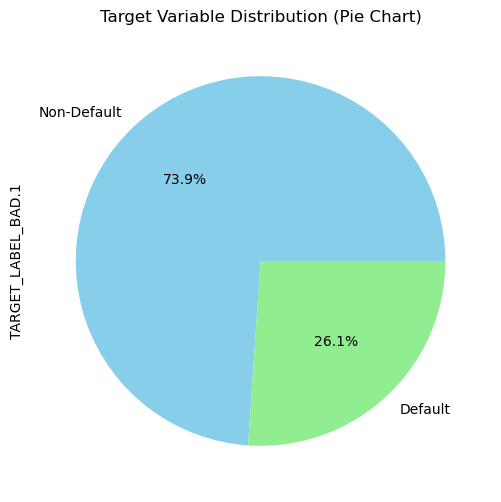

In [66]:
# Plot pie chart for class distribution
plt.figure(figsize=(6, 6))
data_train['TARGET_LABEL_BAD.1'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Non-Default', 'Default'], colors=['skyblue', 'lightgreen'])
plt.title('Target Variable Distribution (Pie Chart)')
plt.show()

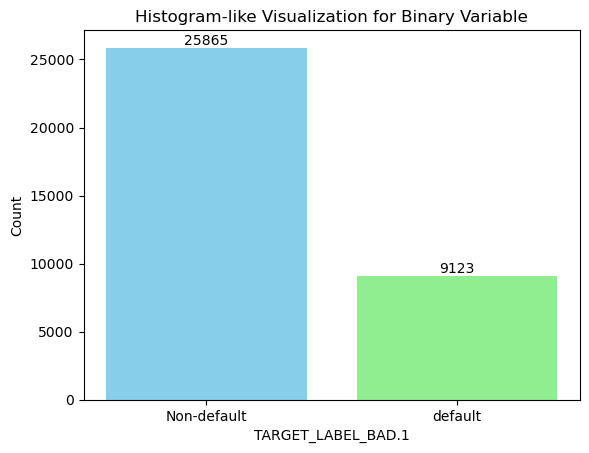

In [67]:
# Count the occurrences of each category (0 or 1)
counts = data_train['TARGET_LABEL_BAD.1'].value_counts()

# Create a bar plot to mimic a histogram
plt.bar(counts.index, counts.values, color=['skyblue', 'lightgreen'])

# Add labels and title
plt.xlabel('TARGET_LABEL_BAD.1')
plt.ylabel('Count')
plt.title('Histogram-like Visualization for Binary Variable')
plt.xticks(counts.index, labels=['Non-default', 'default'])

for i in range(len(counts)):
    plt.text(counts.index[i], counts.values[i], str(counts.values[i]), ha='center', va='bottom')


# Show the plot
plt.show()

## VARIABLE VISUALISATION

### Categorical

<Axes: ylabel='PAYMENT_DAY'>

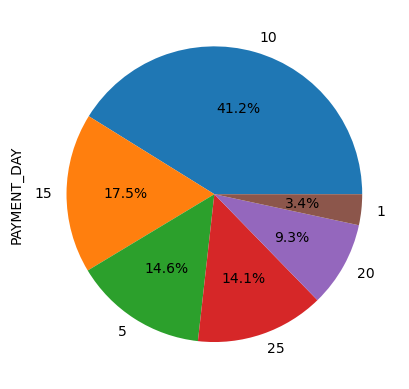

In [68]:
data_train['PAYMENT_DAY'].value_counts().plot(kind = 'pie',autopct = '%1.1f%%')

<Axes: ylabel='RESIDENCIAL_REGION'>

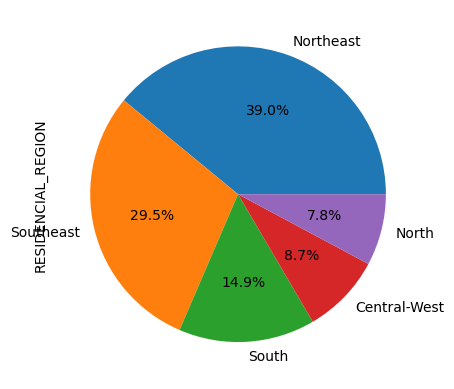

In [69]:
data_train['RESIDENCIAL_REGION'].value_counts().plot(kind = 'pie',autopct = '%1.1f%%')

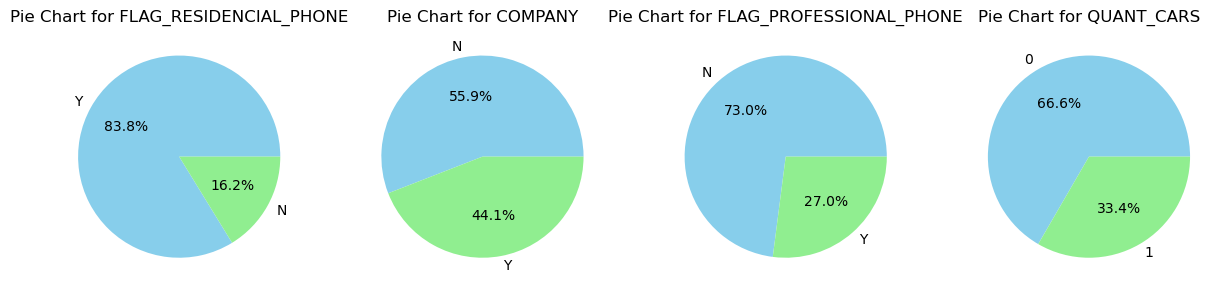

In [70]:
predictors = ['FLAG_RESIDENCIAL_PHONE', 'COMPANY', 'FLAG_PROFESSIONAL_PHONE','QUANT_CARS']

# Create subplots for each pie chart
fig, axs = plt.subplots(1, len(predictors), figsize=(15, 5))

# Plot a pie chart for each predictor
for i, predictor in enumerate(predictors):
    counts = data_train[predictor].value_counts()
    axs[i].pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
    axs[i].set_title(f'Pie Chart for {predictor}')

plt.show()

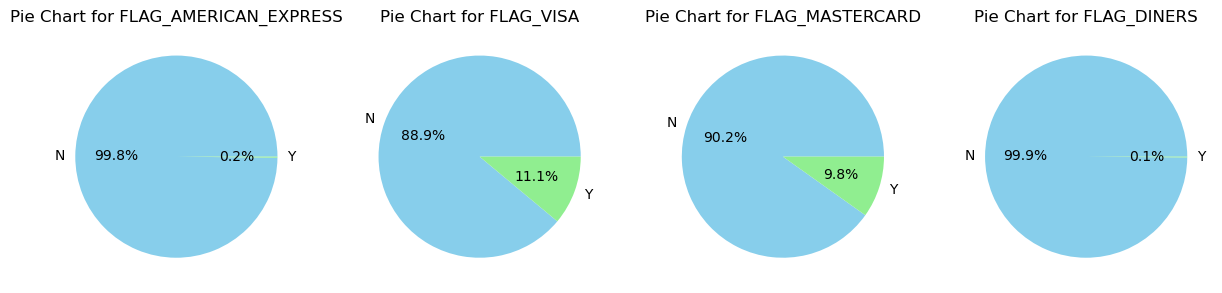

In [71]:
predictors = ['FLAG_AMERICAN_EXPRESS', 'FLAG_VISA', 'FLAG_MASTERCARD', 'FLAG_DINERS']

# Create subplots for each pie chart
fig, axs = plt.subplots(1, len(predictors), figsize=(15, 5))

# Plot a pie chart for each predictor
for i, predictor in enumerate(predictors):
    counts = data_train[predictor].value_counts()

    # Replace 0 and 1 with 'N' and 'Y'
    labels = counts.index.map({0: 'N', 1: 'Y'})

    axs[i].pie(counts, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
    axs[i].set_title(f'Pie Chart for {predictor}')

plt.show()

<Axes: ylabel='APPLICATION_SUBMISSION_TYPE'>

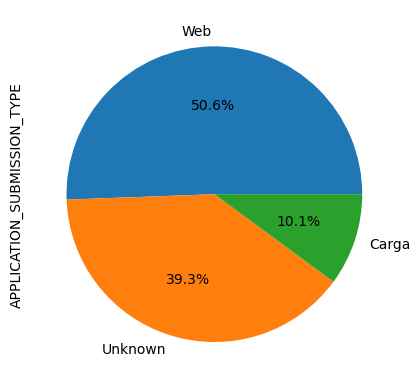

In [72]:
data_train['APPLICATION_SUBMISSION_TYPE'].value_counts().plot(kind = 'pie',autopct = '%1.1f%%')

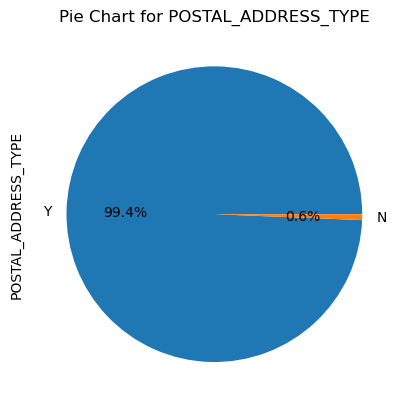

In [73]:
# 'POSTAL_ADDRESS_TYPE' column has values 1 and 2
# Replace these with 'Y' and 'N' only for plotting
labels_for_plotting = data_train['POSTAL_ADDRESS_TYPE'].replace({1: 'Y', 2: 'N'})

# Plot a pie chart
labels_for_plotting.value_counts().plot(kind='pie', autopct='%1.1f%%')

# Set title
plt.title('Pie Chart for POSTAL_ADDRESS_TYPE')

# Show the plot
plt.show()

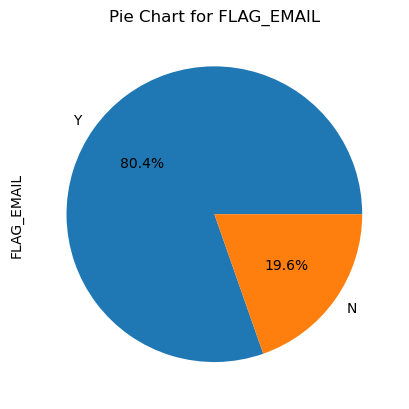

In [74]:
# Replace these with 'Y' and 'N' only for plotting
labels_for_plotting = data_train['FLAG_EMAIL'].replace({1: 'Y', 0: 'N'})

# Plot a pie chart
labels_for_plotting.value_counts().plot(kind='pie', autopct='%1.1f%%')

# Set title
plt.title('Pie Chart for FLAG_EMAIL')

# Show the plot
plt.show()

<Axes: ylabel='MARITAL_STATUS'>

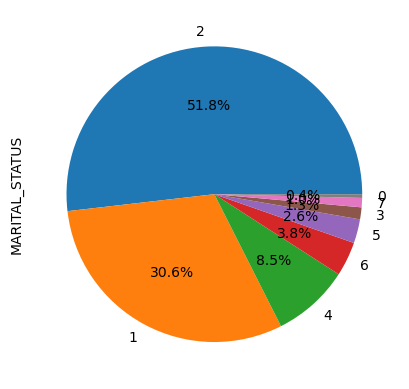

In [75]:
data_train['MARITAL_STATUS'].value_counts().plot(kind = 'pie',autopct = '%1.1f%%')

### NUMERICAL - Outlier
We used box-wiskers plots and scatter plots to visualise all the numeric varibles' distributions

In [76]:
numerical_predictor_columns = [
    "QUANT_DEPENDANTS",
    "MONTHS_IN_RESIDENCE",
    "PERSONAL_MONTHLY_INCOME",
    "OTHER_INCOMES",
    "AGE",
]
data_train[numerical_predictor_columns].describe()

QUANT_DEPENDANTS  MONTHS_IN_RESIDENCE  PERSONAL_MONTHLY_INCOME  \
count      34988.000000         34988.000000             34988.000000   
mean           0.649708             9.786070               916.685171   
std            1.200018            10.061082              9148.782879   
min            0.000000             0.000000                60.000000   
25%            0.000000             3.000000               360.000000   
50%            0.000000             6.000000               500.000000   
75%            1.000000            14.000000               800.000000   
max           53.000000           228.000000            959000.000000   

       OTHER_INCOMES           AGE  
count   34988.000000  34988.000000  
mean       37.131006     43.228307  
std      1056.144886     14.969630  
min         0.000000     18.000000  
25%         0.000000     31.000000  
50%         0.000000     41.000000  
75%         0.000000     53.000000  
max    194344.000000    106.000000

In [77]:
def visualize_predictors(data, var):

    # Plotting: boxplot, scatterplot, and histogram
    plt.figure(figsize=(20, 18))

    # First subplot: boxplot
    plt.subplot(3, 1, 1)
    sns.boxplot(x=data[var], color="blue", width=0.5)
    plt.title(f"Boxplot of {var}")
    plt.xlabel(var)

    # Second subplot: scatterplot, including outliers
    plt.subplot(3, 1, 2)
    plt.scatter(data.index, data[var], color="blue", label="Data", alpha=0.6)
    plt.title(f"Scatterplot of {var}")
    plt.xlabel("Index")
    plt.ylabel(var)
    plt.legend()

    # Third subplot: histogram, including outliers
    plt.subplot(3, 1, 3)
    plt.hist(data[var],bins = 30, color="blue", edgecolor="black", alpha=0.7)
    plt.title(f"Histogram of {var}")
    plt.xlabel(var)
    plt.ylabel("Frequency")

    plt.show()

### "QUANT_DEPENDANTS"

Manually remove values greater than 50, because it's unlikely to take care of 50 people for one person. 

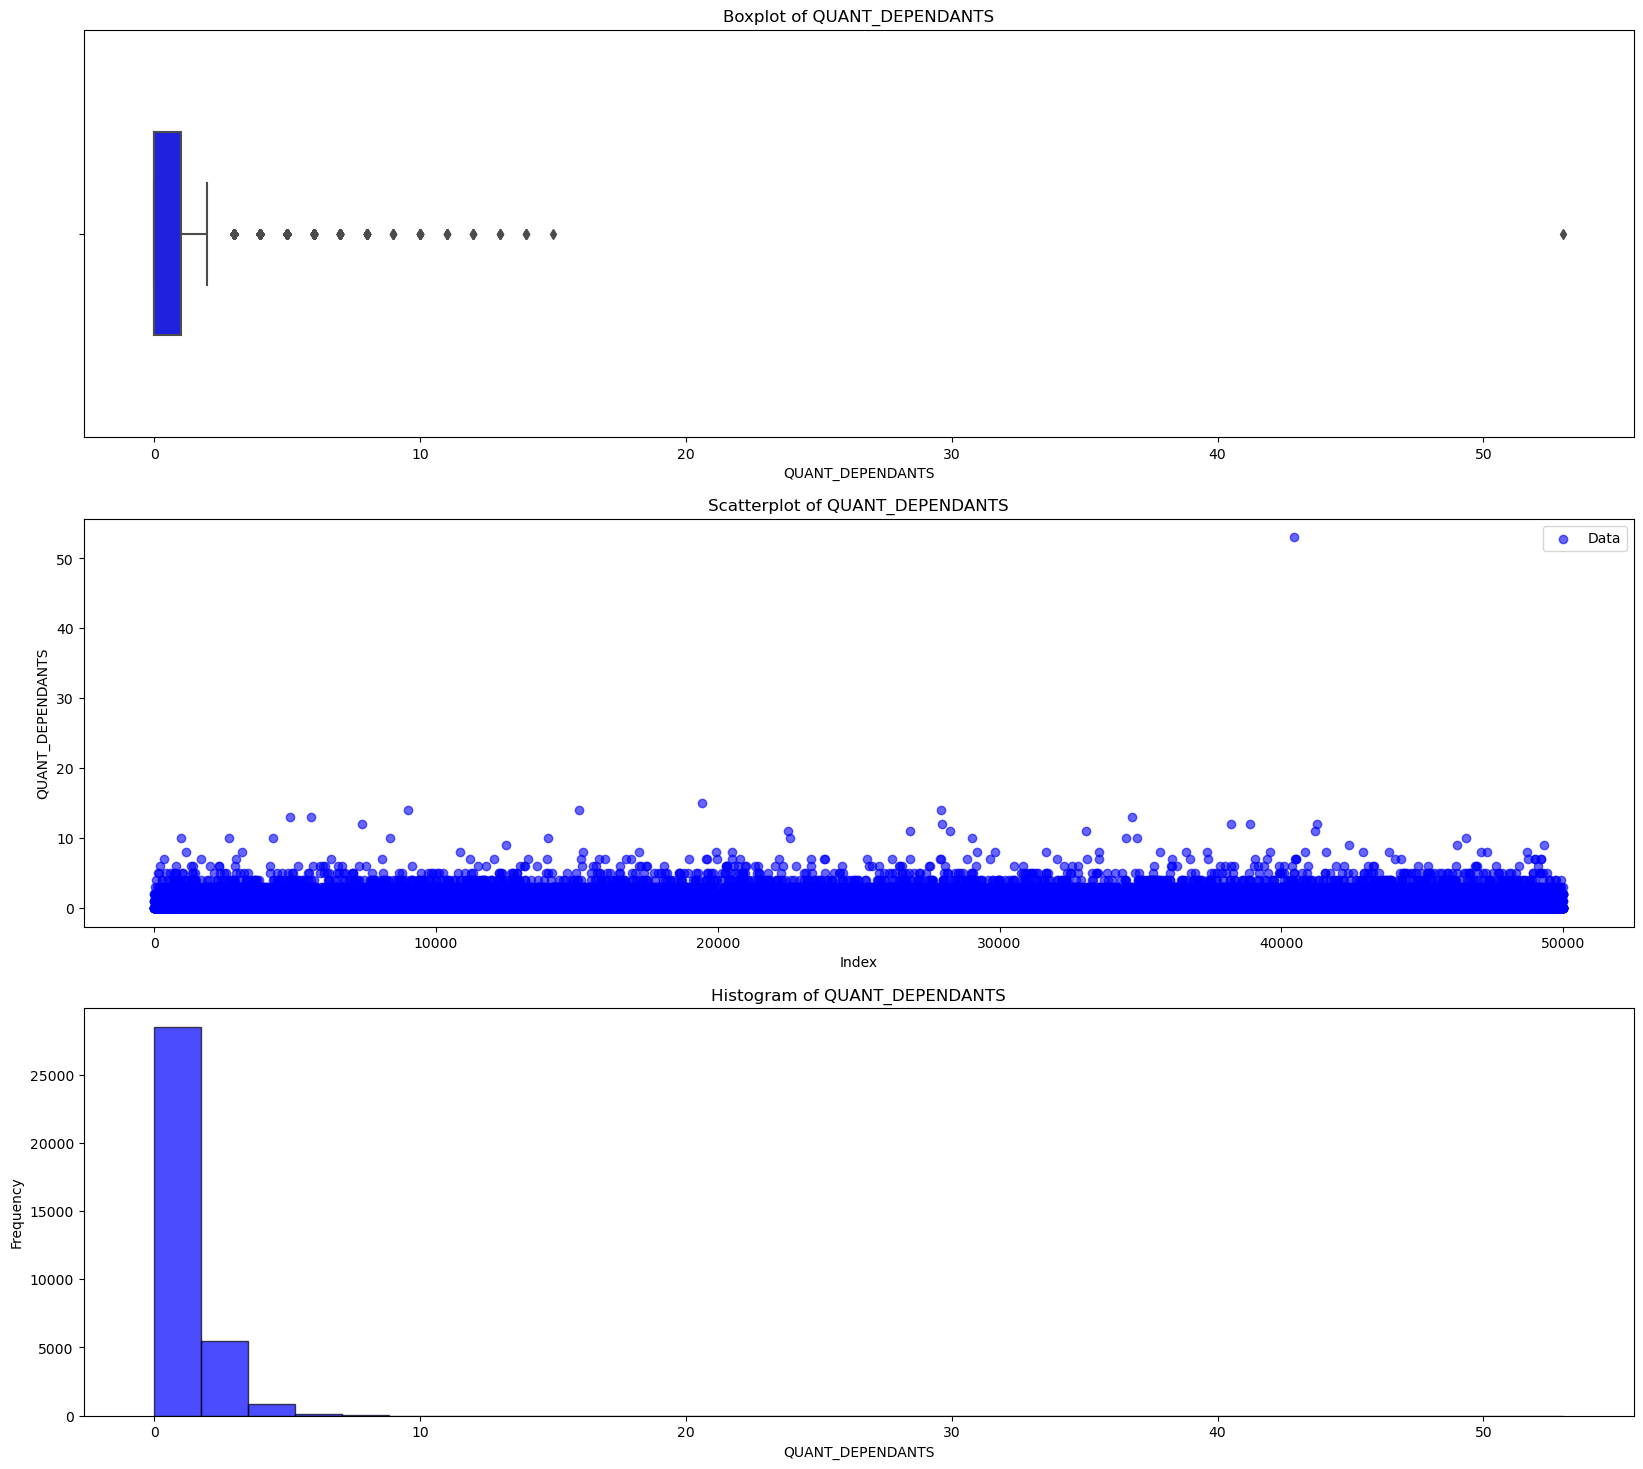

In [78]:
visualize_predictors(data_train, 'QUANT_DEPENDANTS')

In [79]:
data_train = data_train[data_train['QUANT_DEPENDANTS'] <= 50]

In [80]:
data_test = data_test[data_test['QUANT_DEPENDANTS'] <= 50]

In [81]:
data_train['QUANT_DEPENDANTS'].value_counts()

0     23538
1      4910
2      3768
3      1737
4       597
5       242
6        93
7        49
8        22
10       10
12        5
11        5
9         4
14        3
13        3
15        1
Name: QUANT_DEPENDANTS, dtype: int64

### "AGE"

Approximately normal, use z-SCORE to remove outliers

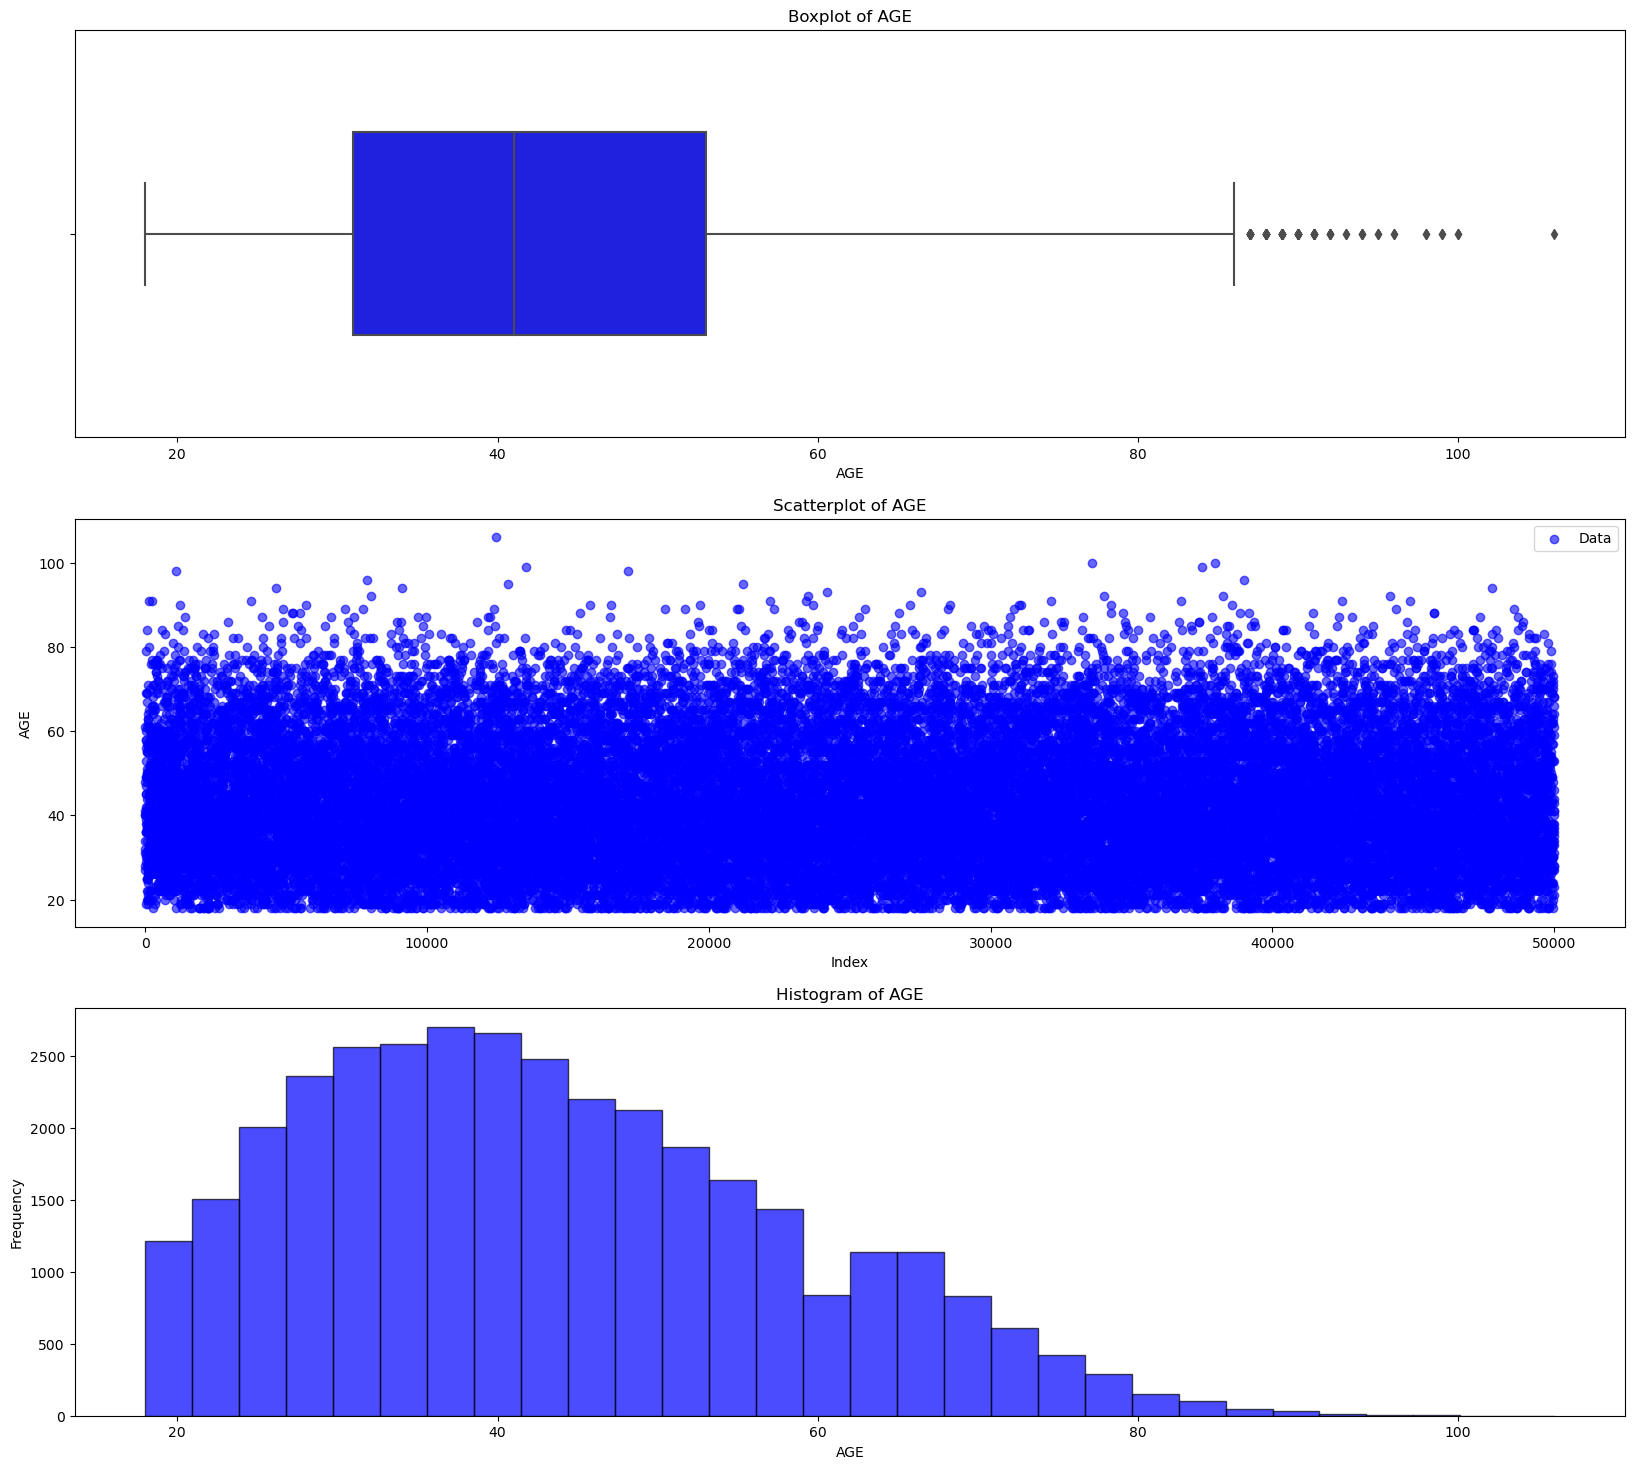

In [82]:
visualize_predictors(data_train, 'AGE')

In [83]:
# Assuming 'AGE' is the column you want to filter in both training and test DataFrames
# Calculate the mean and standard deviation from the training set
mean_age_train = data_train['AGE'].mean()
std_age_train = data_train['AGE'].std()

# Standardize the 'AGE' variable in the training set
data_train['AGE_ZSCORE'] = (data_train['AGE'] - mean_age_train) / std_age_train

# Create a new DataFrame for the training set excluding rows with z-scores outside the range [-3, 3]
data_train = data_train[(data_train['AGE_ZSCORE'] >= -3) & (data_train['AGE_ZSCORE'] <= 3)]

# Drop the temporary 'AGE_ZSCORE' column if you no longer need it
data_train = data_train.drop(columns=['AGE_ZSCORE'])

In [84]:
# Calculate the cutoff age values for the z-scores of -3 and 3
cutoff_age_min = (-3 * std_age_train) + mean_age_train
cutoff_age_max = (3 * std_age_train) + mean_age_train

print(f"Cutoff Age for Z-Score -3: {cutoff_age_min}")
print(f"Cutoff Age for Z-Score 3: {cutoff_age_max}")

Cutoff Age for Z-Score -3: -1.6812951880512799
Cutoff Age for Z-Score 3: 88.13763611468117


In [85]:
data_test = data_test[data_test['AGE'] <= cutoff_age_max]

#### "MONTHS_IN_RESIDENCE"

We will not consider high values as outliers as they are reasonable and can include valuable information given the nature of the variable

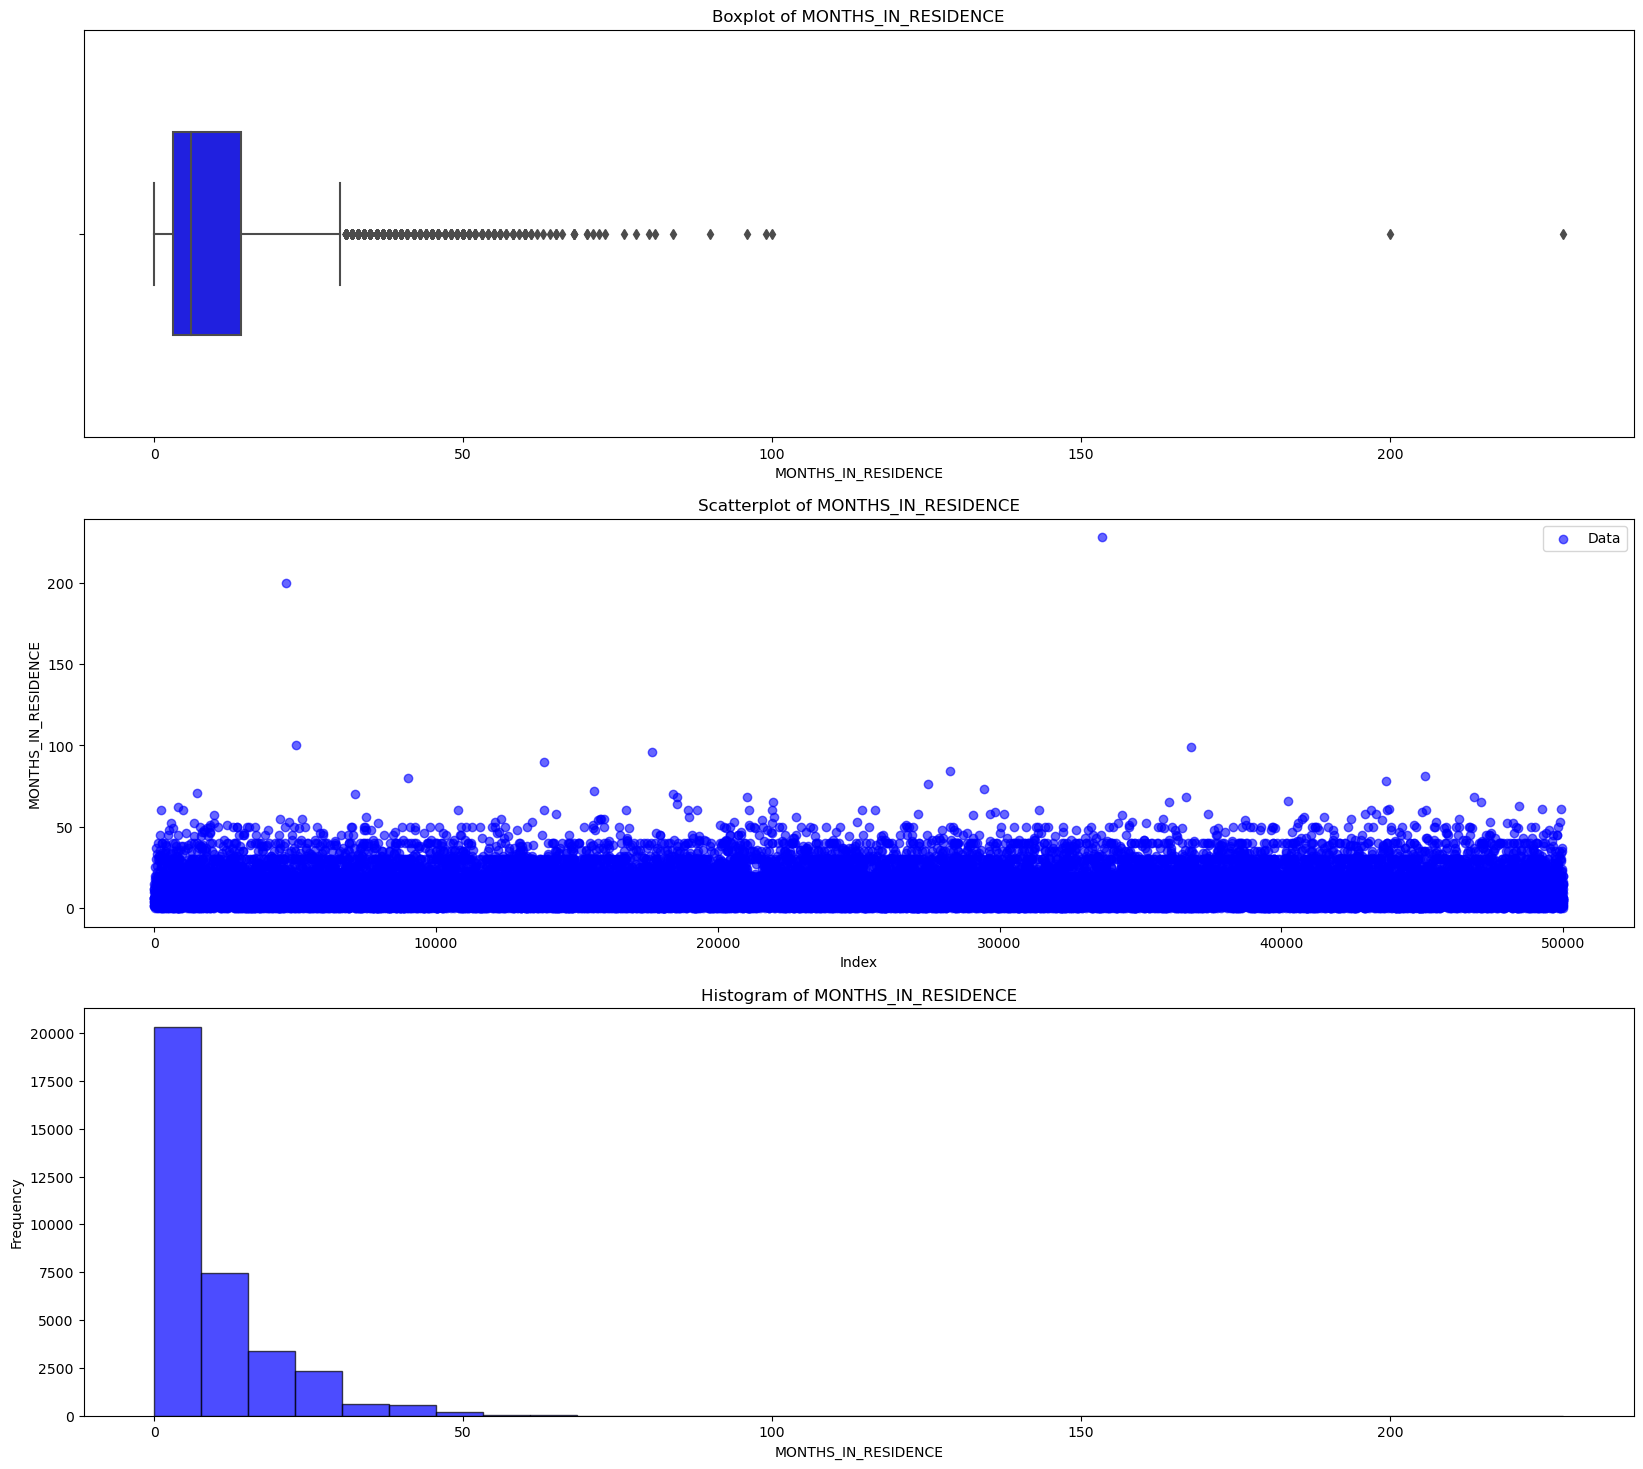

In [86]:
visualize_predictors(data_train, 'MONTHS_IN_RESIDENCE')

#### "PERSONAL_MONTHLY_INCOME"

We will not consider high values as outliers as they are reasonable and can include valuable information given the nature of the variable

In [87]:
data_train['PERSONAL_MONTHLY_INCOME'].value_counts()

350.00       4741
500.00       1001
400.00        978
380.00        949
600.00        797
700.00        657
800.00        628
450.00        538
300.00        512
1000.00       443
351.00        356
1200.00       356
381.00        343
900.00        269
250.00        267
1500.00       261
200.00        258
550.00        256
650.00        242
360.00        203
420.00        153
2000.00       147
480.00        140
750.00        136
370.00        131
1100.00       127
850.00        113
372.00        113
525.00        105
1300.00       102
390.00        102
430.00         99
1400.00        97
460.00         92
1800.00        87
950.00         87
440.00         86
405.00         85
385.00         81
560.00         74
580.00         69
375.00         68
277.00         66
1050.00        65
520.00         64
246.00         63
470.00         62
490.00         61
760.00         60
2500.00        60
402.00         59
374.00         59
403.00         57
1600.00        57
395.00         57
351.33    

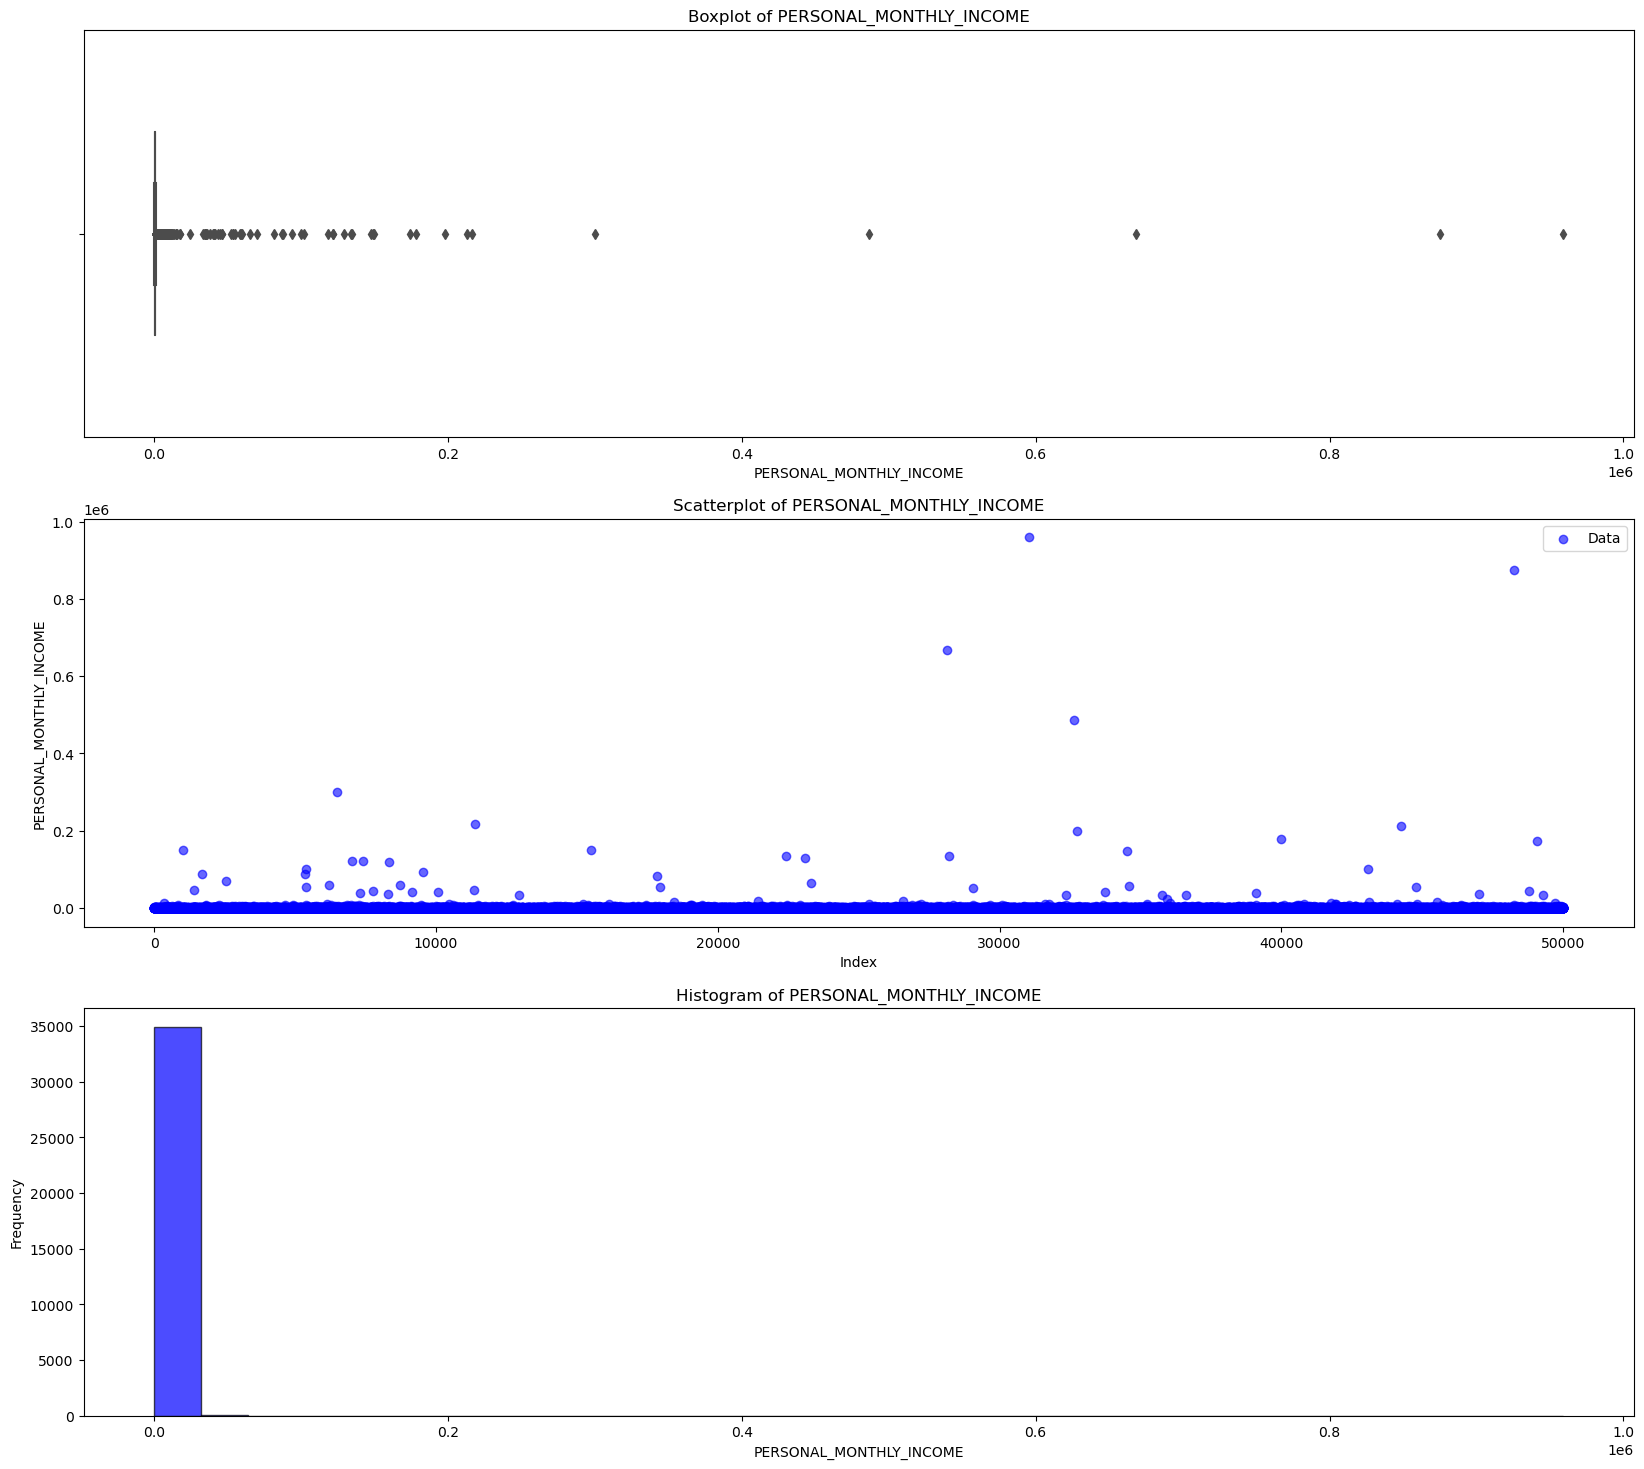

In [88]:
visualize_predictors(data_train, 'PERSONAL_MONTHLY_INCOME')

In [89]:
data_train['PERSONAL_MONTHLY_INCOME'].describe()

count     34931.000000
mean        917.448905
std        9156.219028
min          60.000000
25%         360.000000
50%         500.000000
75%         800.000000
max      959000.000000
Name: PERSONAL_MONTHLY_INCOME, dtype: float64

#### "OTHER_INCOME"

We will not consider high values as outliers as they are reasonable and can include valuable information given the nature of the variable

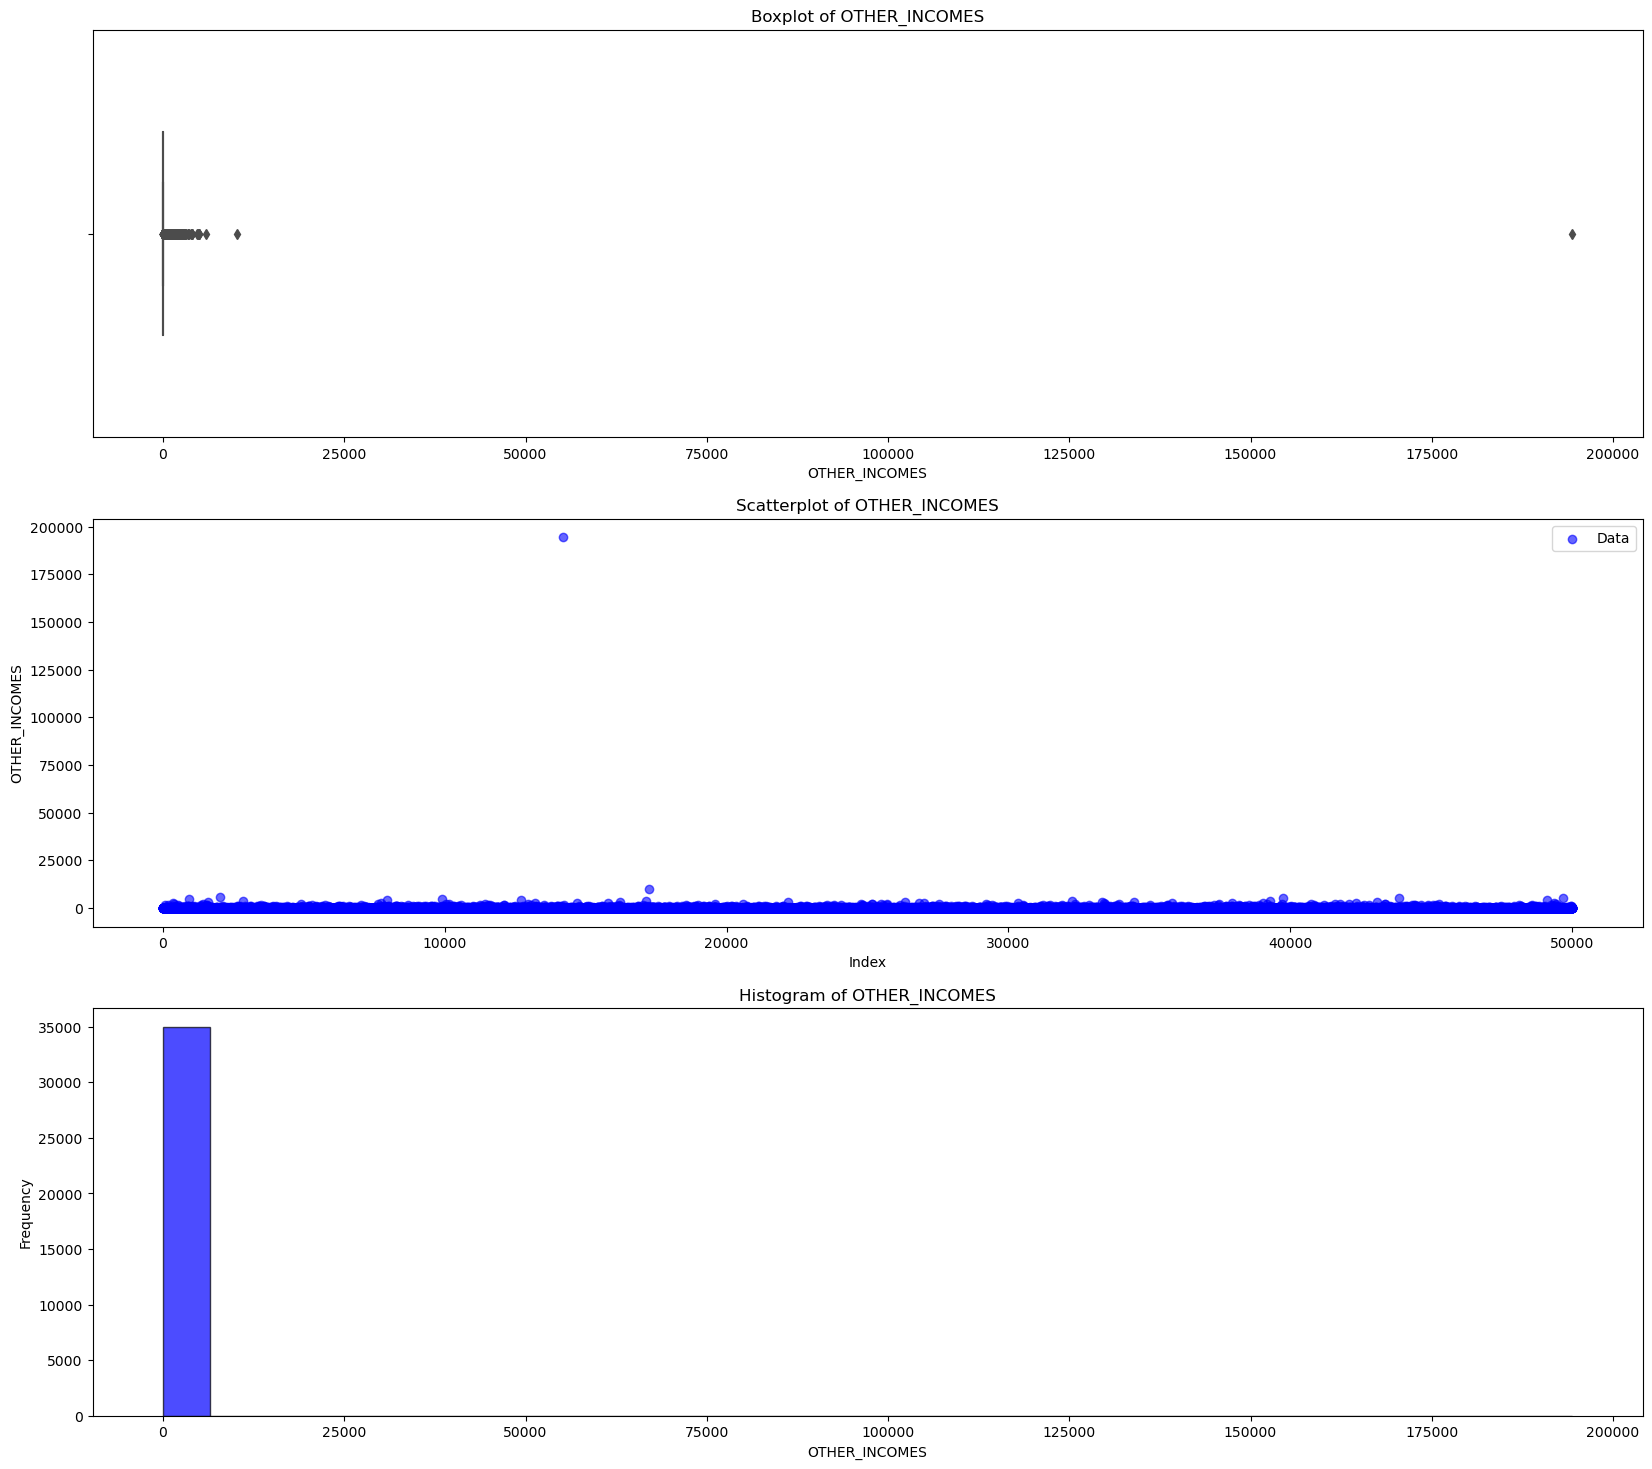

In [90]:
visualize_predictors(data_train, 'OTHER_INCOMES')

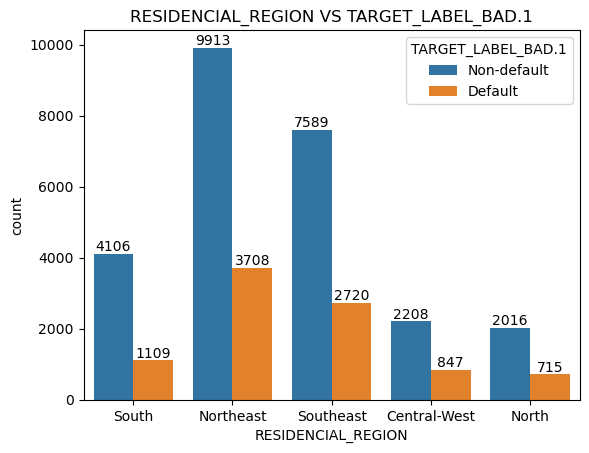

In [91]:
#'TARGET_LABEL_BAD.1' column has values 0 and 1
# Replace these with 'Non-default' and 'Default' only for plotting
hue_for_plotting = data_train['TARGET_LABEL_BAD.1'].replace({0: 'Non-default', 1: 'Default'})

fig1, ax1 = plt.subplots()
sns.countplot(data=data_train, x=data_train['RESIDENCIAL_REGION'], hue=hue_for_plotting, ax=ax1)
plt.title('RESIDENCIAL_REGION VS TARGET_LABEL_BAD.1')

# Add labels to each bar
for label in ax1.containers:
    ax1.bar_label(label)

plt.show()

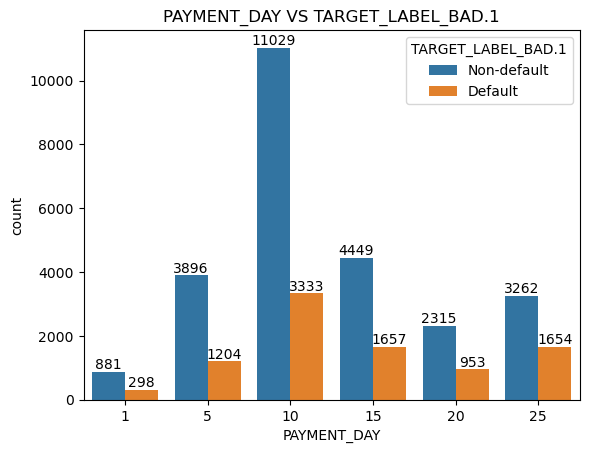

In [92]:
#'TARGET_LABEL_BAD.1' column has values 0 and 1
# Replace these with 'Non-default' and 'Default' only for plotting
hue_for_plotting = data_train['TARGET_LABEL_BAD.1'].replace({0: 'Non-default', 1: 'Default'})

fig2, ax2 = plt.subplots()
sns.countplot(data=data_train, x=data_train['PAYMENT_DAY'], hue=hue_for_plotting, ax=ax2)
plt.title('PAYMENT_DAY VS TARGET_LABEL_BAD.1')

# Add labels to each bar
for label in ax2.containers:
    ax2.bar_label(label)

plt.show()

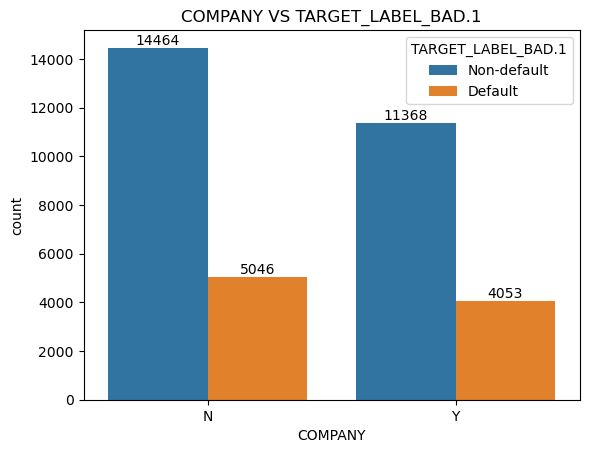

In [93]:
#'TARGET_LABEL_BAD.1' column has values 0 and 1
# Replace these with 'Non-default' and 'Default' only for plotting
hue_for_plotting = data_train['TARGET_LABEL_BAD.1'].replace({0: 'Non-default', 1: 'Default'})

fig3, ax3 = plt.subplots()
sns.countplot(data=data_train, x=data_train['COMPANY'], hue=hue_for_plotting, ax=ax3)
plt.title('COMPANY VS TARGET_LABEL_BAD.1')

# Add labels to each bar
for label in ax3.containers:
    ax3.bar_label(label)

plt.show()

### Numerical Variables

In [94]:
num_data = data_train[['QUANT_DEPENDANTS', 'MONTHS_IN_RESIDENCE', 'PERSONAL_MONTHLY_INCOME', 'OTHER_INCOMES','AGE']]

In [95]:
num_data.head()

QUANT_DEPENDANTS  MONTHS_IN_RESIDENCE  PERSONAL_MONTHLY_INCOME  \
35652                 0                  6.0                    735.0   
10443                 0                 22.0                    972.0   
39543                 0                  0.0                    482.0   
17395                 0                 31.0                    912.0   
7491                  0                 30.0                    454.0   

       OTHER_INCOMES  AGE  
35652            0.0   68  
10443            0.0   61  
39543            0.0   64  
17395            0.0   68  
7491             0.0   39

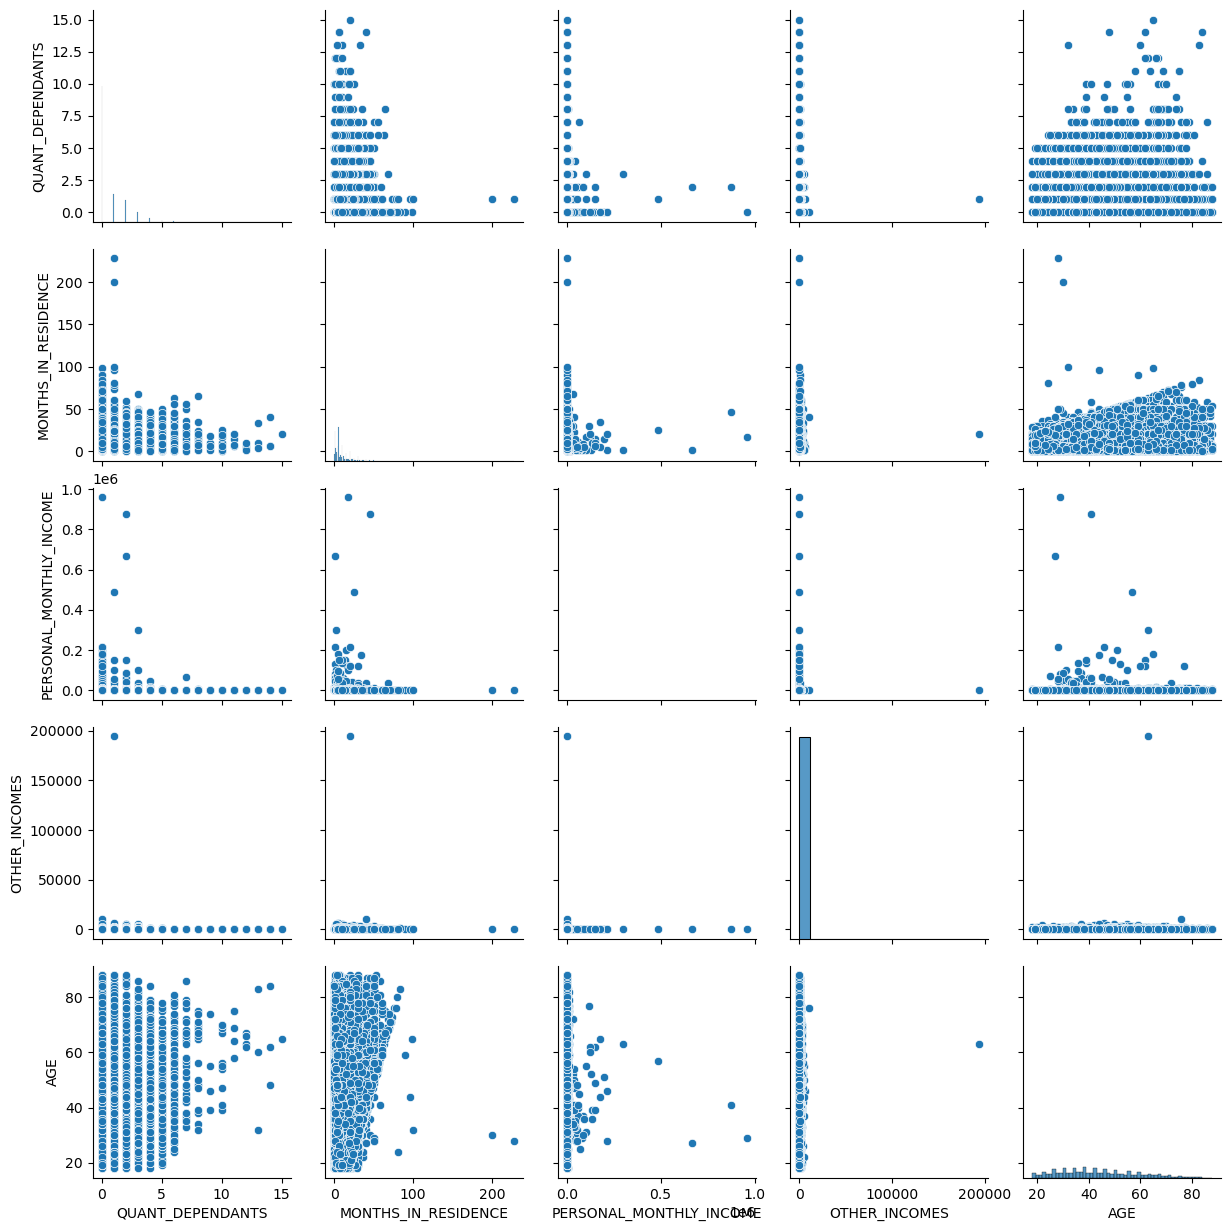

In [96]:
sns.pairplot(num_data)
plt.show()

# SCALING - Logistic

In [97]:
# Extract the numerical predictor columns (replace with your column names)
numerical_predictor_columns = ['QUANT_DEPENDANTS', 'MONTHS_IN_RESIDENCE', 'PERSONAL_MONTHLY_INCOME', 'OTHER_INCOMES','AGE']

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the numerical predictors
# data_train[numerical_predictor_columns] = scaler.fit_transform(data_train[numerical_predictor_columns])
# data_test[numerical_predictor_columns] = scaler.fit_transform(data_test[numerical_predictor_columns])
data_train_logit = copy.deepcopy(data_train)
data_test_logit = copy.deepcopy(data_test)

data_train_logit[numerical_predictor_columns] = scaler.fit_transform(data_train_logit[numerical_predictor_columns])
data_test_logit[numerical_predictor_columns] = scaler.fit_transform(data_test_logit[numerical_predictor_columns])

# GET DUMMIES

In [98]:
data_train.head()

PAYMENT_DAY  QUANT_DEPENDANTS FLAG_RESIDENCIAL_PHONE  \
35652            5                 0                      N   
10443            5                 0                      Y   
39543           15                 0                      Y   
17395           10                 0                      Y   
7491             5                 0                      Y   

       MONTHS_IN_RESIDENCE  PERSONAL_MONTHLY_INCOME  OTHER_INCOMES  \
35652                  6.0                    735.0            0.0   
10443                 22.0                    972.0            0.0   
39543                  0.0                    482.0            0.0   
17395                 31.0                    912.0            0.0   
7491                  30.0                    454.0            0.0   

       QUANT_BANKING_ACCOUNTS  QUANT_CARS COMPANY FLAG_PROFESSIONAL_PHONE  \
35652                       1           0       N                       N   
10443                       0           0       N                       N   
39543                       1           1       N                       N   
17395                       0           0       N                       N   
7491                        0           0       N                       N   

       AGE APPLICATION_SUBMISSION_TYPE  POSTAL_ADDRESS_TYPE  FLAG_EMAIL  \
35652   68                     Unknown                    1           1   
10443   61                         Web                    1           1   
39543   64                     Unknown                    1           1   
17395   68                       Carga                    1           1   
7491    39                     Unknown                    1           1   

       FLAG_VISA  FLAG_MASTERCARD  FLAG_DINERS  FLAG_AMERICAN_EXPRESS  \
35652          0                0            0                      0   
10443          0                1            0                      0   
39543          0                0            0                      0   
17395          0                0            0                      0   
7491           0                0            0                      0   

       MARITAL_STATUS  TARGET_LABEL_BAD.1 RESIDENCIAL_REGION  
35652               3                   0              South  
10443               2                   0          Northeast  
39543               4                   1          Northeast  
17395               2                   0              South  
7491                1                   0          Southeast

## One-hot Encoding

In [99]:
categorical_columns = ['FLAG_RESIDENCIAL_PHONE', 'COMPANY','FLAG_PROFESSIONAL_PHONE','APPLICATION_SUBMISSION_TYPE','RESIDENCIAL_REGION']
data_train = pd.get_dummies(data_train, columns=categorical_columns,drop_first=True)
data_test = pd.get_dummies(data_test, columns=categorical_columns,drop_first=True)

data_train_logit = pd.get_dummies(data_train_logit, columns=categorical_columns,drop_first=True)
data_test_logit = pd.get_dummies(data_test_logit, columns=categorical_columns,drop_first=True)

## LABEL ENCODING 

In [100]:
# Assuming 'df' is your DataFrame and 'PAYMENT_DAY' is the column you want to label encode
label_encoder = LabelEncoder()

# Fit the label encoder on your 'PAYMENT_DAY' column and transform it
data_train_logit['PAYMENT_DAY'] = label_encoder.fit_transform(data_train_logit['PAYMENT_DAY'])
data_test_logit['PAYMENT_DAY'] = label_encoder.fit_transform(data_test_logit['PAYMENT_DAY'])

## Heatmap 

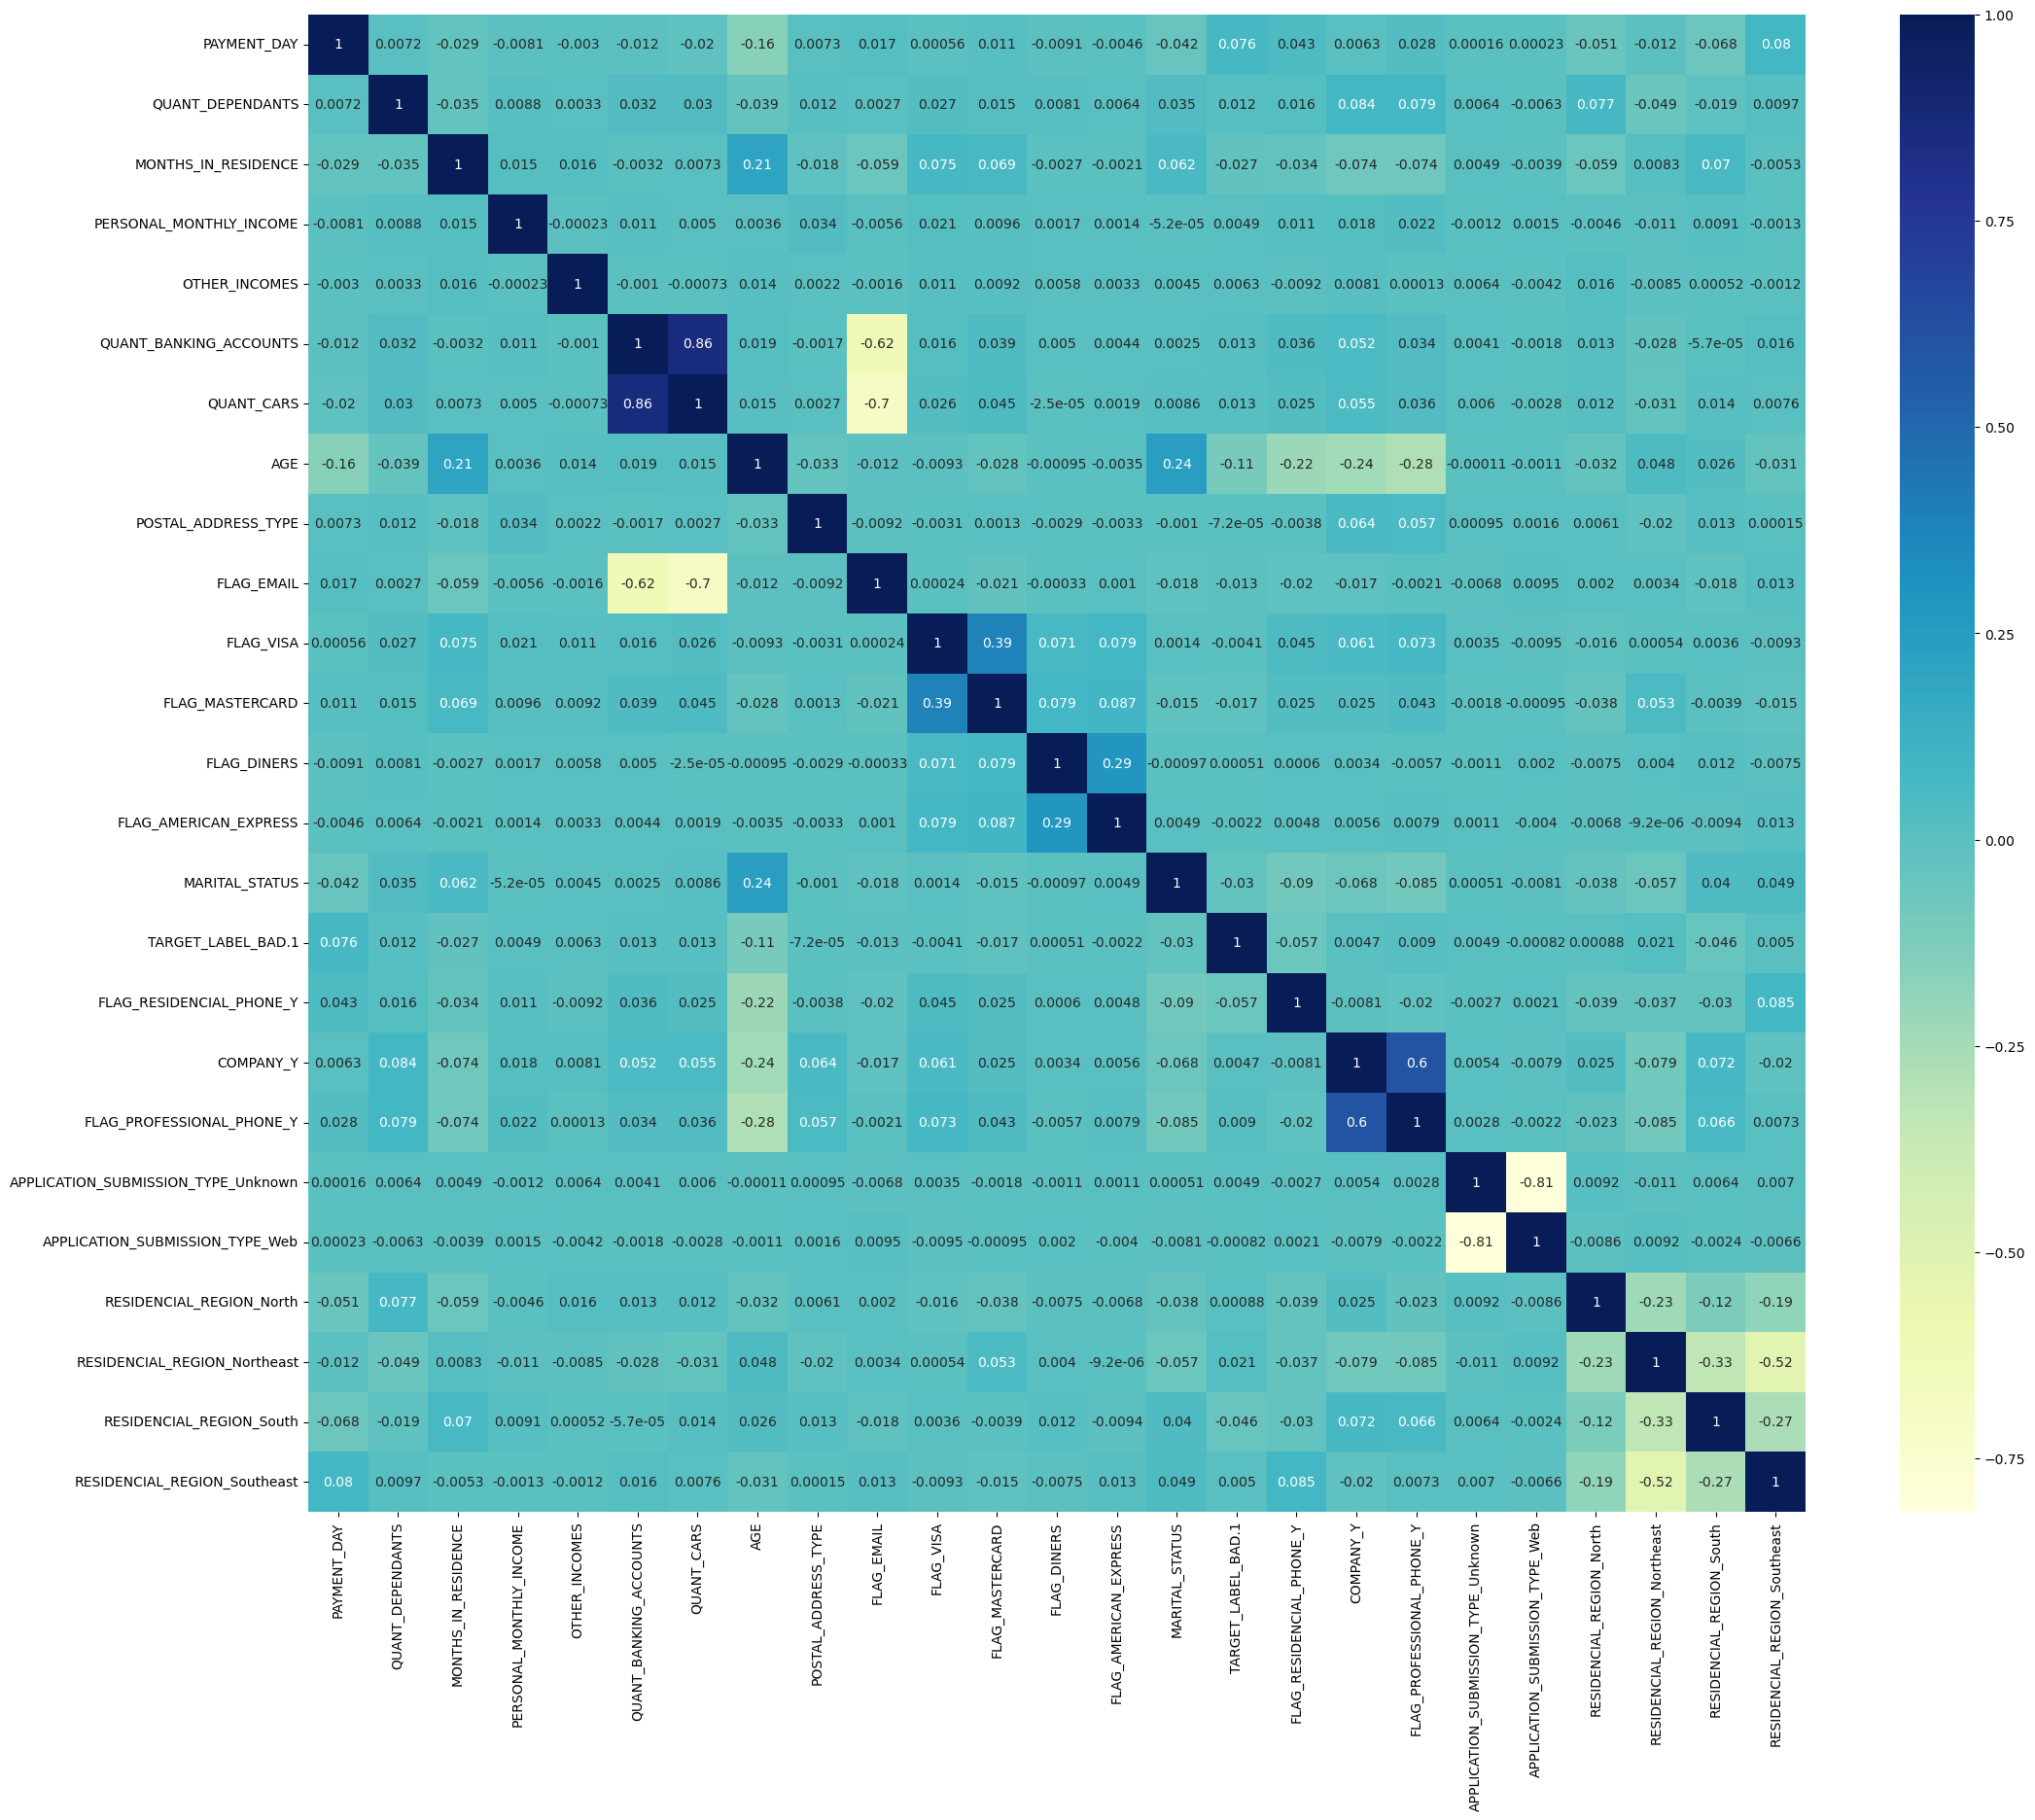

In [101]:
plt.subplots(figsize=(25,20))
sns.heatmap(data_train.corr(),square=True, annot=True,cmap="YlGnBu")
plt.show()

#### QUANT_CARS VS BANKING ACCOUNT - 0.86
drop BANKING ACCOUNT 

In [102]:
data_train_logit['QUANT_CARS'].value_counts()

0    23276
1    11655
Name: QUANT_CARS, dtype: int64

In [103]:
data_train_logit['QUANT_BANKING_ACCOUNTS'].value_counts()

0    22527
1    12394
2       10
Name: QUANT_BANKING_ACCOUNTS, dtype: int64

In [104]:
data_train_logit.drop('QUANT_BANKING_ACCOUNTS', axis=1, inplace=True)

In [105]:
data_test_logit.drop('QUANT_BANKING_ACCOUNTS', axis=1, inplace=True)

# X/Y SPLIT

In [106]:
y_train = data_train['TARGET_LABEL_BAD.1']
x_train = data_train.drop(columns = ['TARGET_LABEL_BAD.1'])
y_test = data_test['TARGET_LABEL_BAD.1']
x_test = data_test.drop(columns = ['TARGET_LABEL_BAD.1'])

y_train_logit = data_train_logit['TARGET_LABEL_BAD.1']
x_train_logit = data_train_logit.drop(columns = ['TARGET_LABEL_BAD.1'])
y_test_logit = data_test_logit['TARGET_LABEL_BAD.1']
x_test_logit = data_test_logit.drop(columns = ['TARGET_LABEL_BAD.1'])

In [107]:
x_train.shape

(34931, 24)

In [108]:
x_train.head()

PAYMENT_DAY  QUANT_DEPENDANTS  MONTHS_IN_RESIDENCE  \
35652            5                 0                  6.0   
10443            5                 0                 22.0   
39543           15                 0                  0.0   
17395           10                 0                 31.0   
7491             5                 0                 30.0   

       PERSONAL_MONTHLY_INCOME  OTHER_INCOMES  QUANT_BANKING_ACCOUNTS  \
35652                    735.0            0.0                       1   
10443                    972.0            0.0                       0   
39543                    482.0            0.0                       1   
17395                    912.0            0.0                       0   
7491                     454.0            0.0                       0   

       QUANT_CARS  AGE  POSTAL_ADDRESS_TYPE  FLAG_EMAIL  FLAG_VISA  \
35652           0   68                    1           1          0   
10443           0   61                    1           1          0   
39543           1   64                    1           1          0   
17395           0   68                    1           1          0   
7491            0   39                    1           1          0   

       FLAG_MASTERCARD  FLAG_DINERS  FLAG_AMERICAN_EXPRESS  MARITAL_STATUS  \
35652                0            0                      0               3   
10443                1            0                      0               2   
39543                0            0                      0               4   
17395                0            0                      0               2   
7491                 0            0                      0               1   

       FLAG_RESIDENCIAL_PHONE_Y  COMPANY_Y  FLAG_PROFESSIONAL_PHONE_Y  \
35652                         0          0                          0   
10443                         1          0                          0   
39543                         1          0                          0   
17395                         1          0                          0   
7491                          1          0                          0   

       APPLICATION_SUBMISSION_TYPE_Unknown  APPLICATION_SUBMISSION_TYPE_Web  \
35652                                    1                                0   
10443                                    0                                1   
39543                                    1                                0   
17395                                    0                                0   
7491                                     1                                0   

       RESIDENCIAL_REGION_North  RESIDENCIAL_REGION_Northeast  \
35652                         0                             0   
10443                         0                             1   
39543                         0                             1   
17395                         0                             0   
7491                          0                             0   

       RESIDENCIAL_REGION_South  RESIDENCIAL_REGION_Southeast  
35652                         1                             0  
10443                         0                             0  
39543                         0                             0  
17395                         1                             0  
7491                          0                             1

# LOGISTIC REGRESSION

In [109]:
# Get the column names
column_names_logit = x_train_logit.columns.tolist()

# Print or use the column names as needed
print(column_names_logit)

['PAYMENT_DAY', 'QUANT_DEPENDANTS', 'MONTHS_IN_RESIDENCE', 'PERSONAL_MONTHLY_INCOME', 'OTHER_INCOMES', 'QUANT_CARS', 'AGE', 'POSTAL_ADDRESS_TYPE', 'FLAG_EMAIL', 'FLAG_VISA', 'FLAG_MASTERCARD', 'FLAG_DINERS', 'FLAG_AMERICAN_EXPRESS', 'MARITAL_STATUS', 'FLAG_RESIDENCIAL_PHONE_Y', 'COMPANY_Y', 'FLAG_PROFESSIONAL_PHONE_Y', 'APPLICATION_SUBMISSION_TYPE_Unknown', 'APPLICATION_SUBMISSION_TYPE_Web', 'RESIDENCIAL_REGION_North', 'RESIDENCIAL_REGION_Northeast', 'RESIDENCIAL_REGION_South', 'RESIDENCIAL_REGION_Southeast']


### Fitting Model
- solver - ‘newton-cholesky’ is a good choice for n_samples >> n_features, especially with one-hot encoded categorical features with rare categories. Note that it is limited to binary classification and the one-versus-rest reduction for multiclass classification. Be aware that the memory usage of this solver has a quadratic dependency on n_features because it explicitly computes the Hessian matrix.

- penalty - None - assume for orginal logistic regression without regularization

- class_weight - balanced - uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).

In [110]:
Logitmodel=LogisticRegression(penalty =None,
                  solver = 'newton-cholesky',
                 class_weight = 'balanced')

logit_result = Logitmodel.fit(x_train_logit,y_train_logit)

### ASSUMPTON TEST

##### Assumption 2 - No perfect Multicollinearity

We use VIF score - and High VIF values (typically above 10) may indicate multicollinearity.

POSTAL_ADDRESS_TYPE have a really high VIF value of 37.135 and the  Encoding not informed.- we decide to exclude it to make our model more robust

In [111]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming x_train is your design matrix
vif_data = pd.DataFrame()
vif_data["Variable"] = x_train_logit.columns
vif_data["VIF"] = [variance_inflation_factor(x_train_logit.values, i) for i in range(x_train_logit.shape[1])]

print(vif_data)

                               Variable        VIF
0                           PAYMENT_DAY   4.809820
1                      QUANT_DEPENDANTS   1.020581
2                   MONTHS_IN_RESIDENCE   1.072129
3               PERSONAL_MONTHLY_INCOME   1.002045
4                         OTHER_INCOMES   1.001092
5                            QUANT_CARS   2.836412
6                                   AGE   1.287301
7                   POSTAL_ADDRESS_TYPE  37.236612
8                            FLAG_EMAIL   9.387932
9                             FLAG_VISA   1.342239
10                      FLAG_MASTERCARD   1.323749
11                          FLAG_DINERS   1.098756
12                FLAG_AMERICAN_EXPRESS   1.100892
13                       MARITAL_STATUS   3.849175
14             FLAG_RESIDENCIAL_PHONE_Y   6.444359
15                            COMPANY_Y   2.840618
16            FLAG_PROFESSIONAL_PHONE_Y   2.233897
17  APPLICATION_SUBMISSION_TYPE_Unknown   4.724746
18      APPLICATION_SUBMISSION_

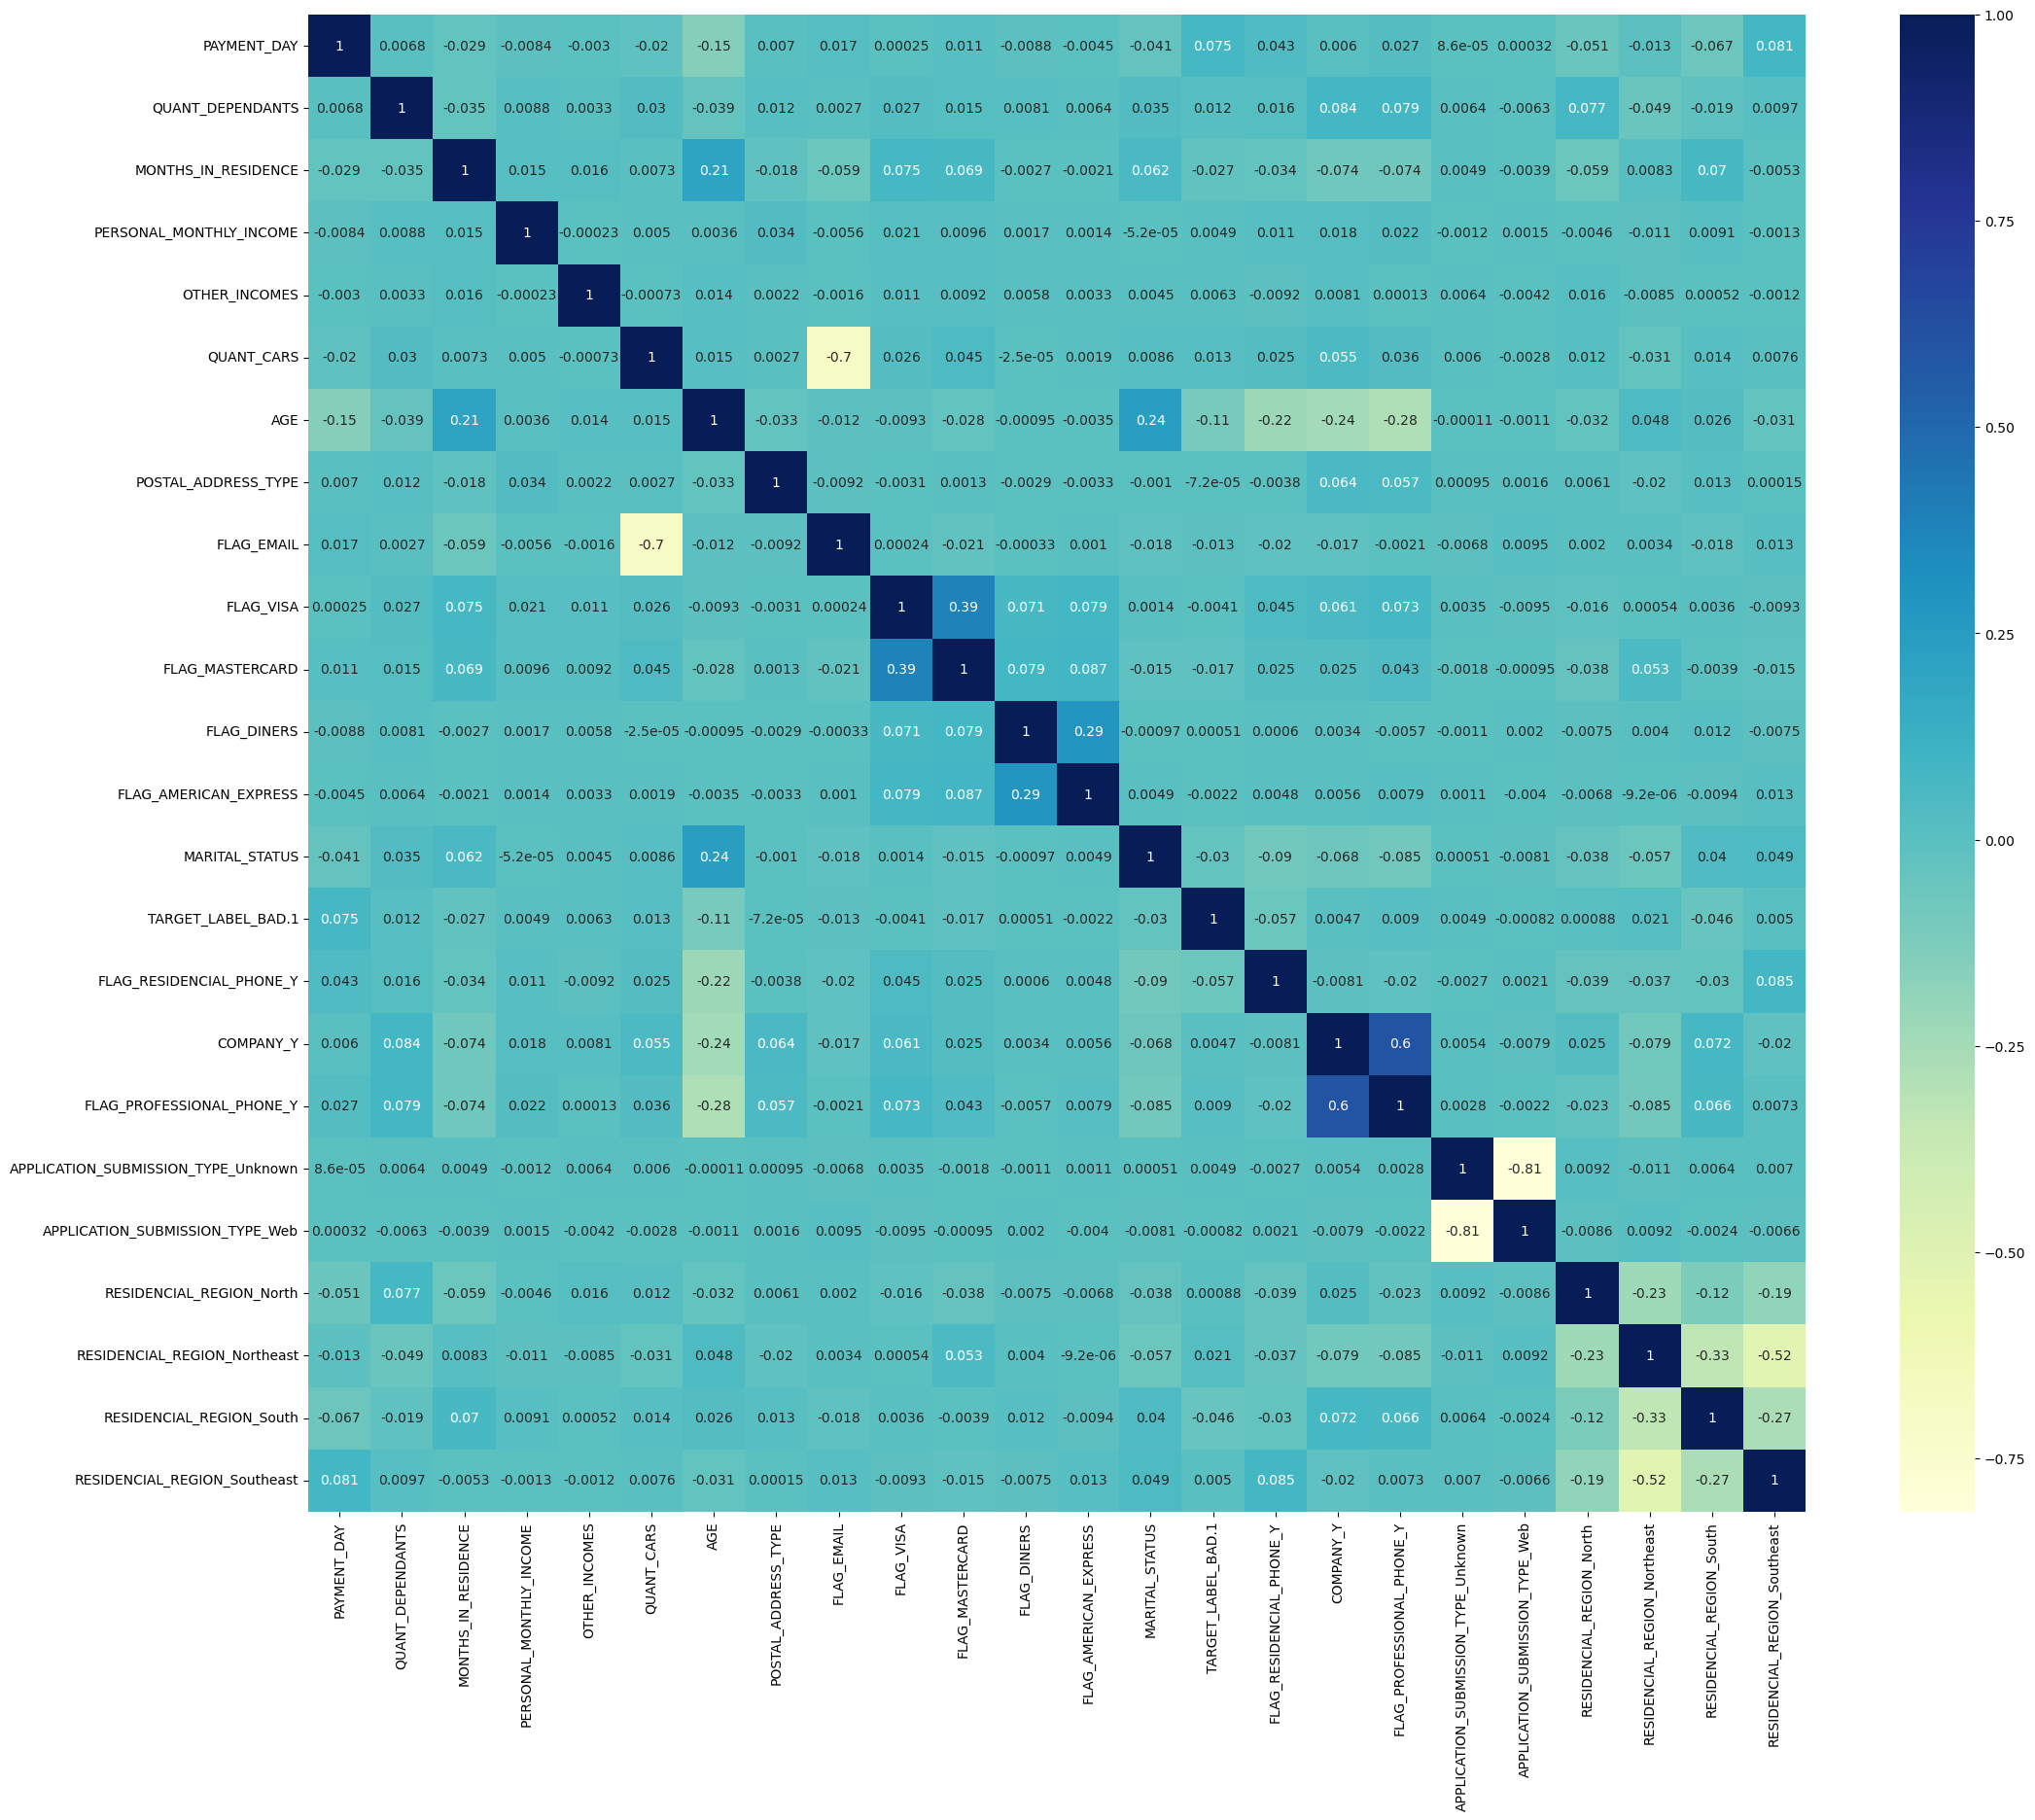

In [112]:
plt.subplots(figsize=(25,20))
sns.heatmap(data_train_logit.corr(),square=True, annot=True,cmap="YlGnBu")
plt.show()

In [113]:
data_train_logit.drop('POSTAL_ADDRESS_TYPE', axis=1, inplace=True)

In [114]:
data_test_logit.drop('POSTAL_ADDRESS_TYPE', axis=1, inplace=True)

##### Assumption 3 - Linearity

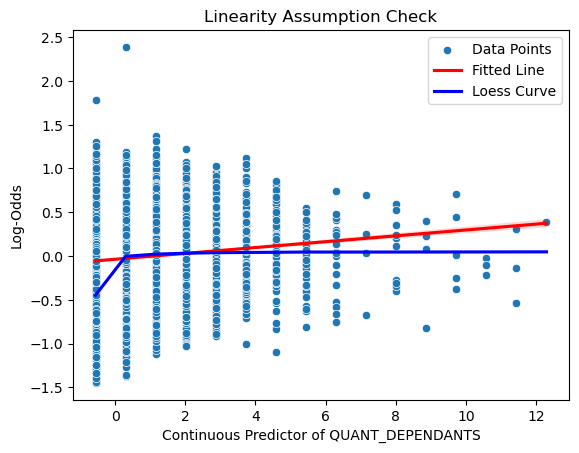

In [115]:
# Calculate predicted probabilities and log-odds
predicted_probs = logit_result.predict_proba(x_train_logit)[:, 1]
log_odds = np.log(predicted_probs / (1 - predicted_probs))

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'Continuous Predictor': x_train_logit['QUANT_DEPENDANTS'],
                          'Log-Odds': log_odds})

# Scatterplot with loess curve and fitted line
sns.scatterplot(x='Continuous Predictor', y='Log-Odds', data=plot_data, label='Data Points')
sns.regplot(x='Continuous Predictor', y='Log-Odds', data=plot_data, scatter=False, label='Fitted Line', color='red', order=1)
sns.regplot(x='Continuous Predictor', y='Log-Odds', data=plot_data, scatter=False, lowess=True, label='Loess Curve', color='blue')

# Customize the plot
plt.title('Linearity Assumption Check')
plt.xlabel('Continuous Predictor of QUANT_DEPENDANTS')
plt.ylabel('Log-Odds')
plt.legend()
plt.show()

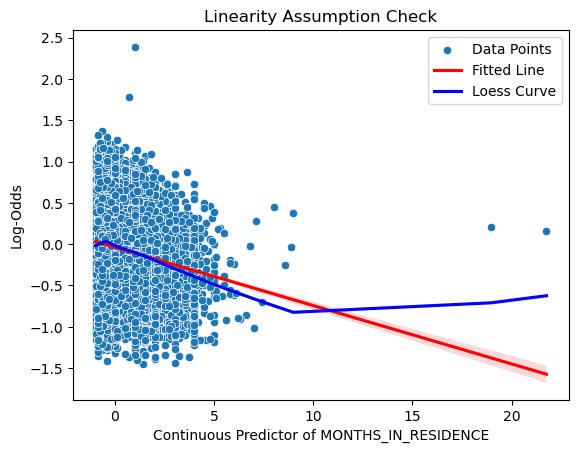

In [116]:
# Calculate predicted probabilities and log-odds
predicted_probs = logit_result.predict_proba(x_train_logit)[:, 1]
log_odds = np.log(predicted_probs / (1 - predicted_probs))

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'Continuous Predictor': x_train_logit['MONTHS_IN_RESIDENCE'],
                          'Log-Odds': log_odds})

# Scatterplot with loess curve and fitted line
sns.scatterplot(x='Continuous Predictor', y='Log-Odds', data=plot_data, label='Data Points')
sns.regplot(x='Continuous Predictor', y='Log-Odds', data=plot_data, scatter=False, label='Fitted Line', color='red', order=1)
sns.regplot(x='Continuous Predictor', y='Log-Odds', data=plot_data, scatter=False, lowess=True, label='Loess Curve', color='blue')

# Customize the plot
plt.title('Linearity Assumption Check')
plt.xlabel('Continuous Predictor of MONTHS_IN_RESIDENCE')
plt.ylabel('Log-Odds')
plt.legend()
plt.show()

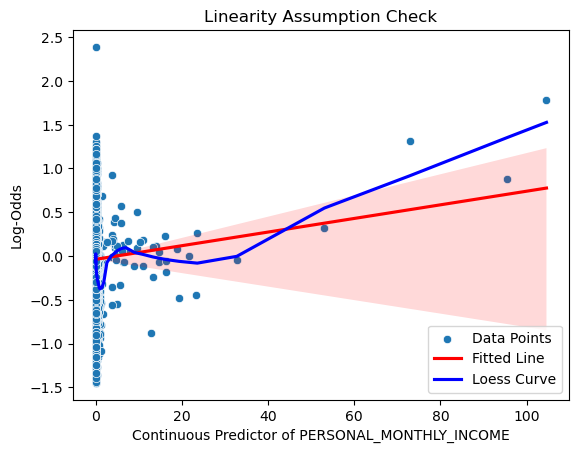

In [117]:
# Calculate predicted probabilities and log-odds
predicted_probs = logit_result.predict_proba(x_train_logit)[:, 1]
log_odds = np.log(predicted_probs / (1 - predicted_probs))

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'Continuous Predictor': x_train_logit['PERSONAL_MONTHLY_INCOME'],
                          'Log-Odds': log_odds})

# Scatterplot with loess curve and fitted line
sns.scatterplot(x='Continuous Predictor', y='Log-Odds', data=plot_data, label='Data Points')
sns.regplot(x='Continuous Predictor', y='Log-Odds', data=plot_data, scatter=False, label='Fitted Line', color='red', order=1)
sns.regplot(x='Continuous Predictor', y='Log-Odds', data=plot_data, scatter=False, lowess=True, label='Loess Curve', color='blue')

# Customize the plot
plt.title('Linearity Assumption Check')
plt.xlabel('Continuous Predictor of PERSONAL_MONTHLY_INCOME')
plt.ylabel('Log-Odds')
plt.legend()
plt.show()

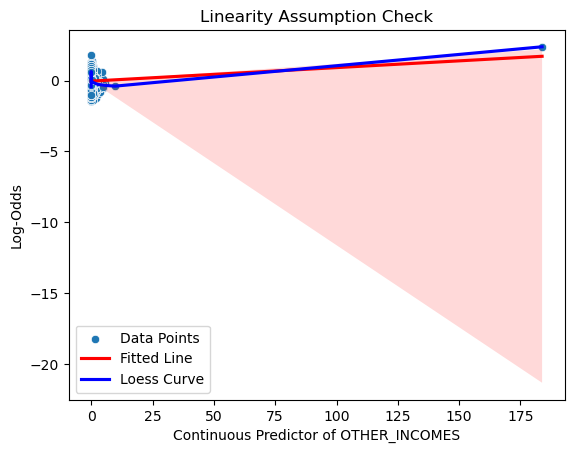

In [118]:
# Calculate predicted probabilities and log-odds
predicted_probs = logit_result.predict_proba(x_train_logit)[:, 1]
log_odds = np.log(predicted_probs / (1 - predicted_probs))

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'Continuous Predictor': x_train_logit['OTHER_INCOMES'],
                          'Log-Odds': log_odds})

# Scatterplot with loess curve and fitted line
sns.scatterplot(x='Continuous Predictor', y='Log-Odds', data=plot_data, label='Data Points')
sns.regplot(x='Continuous Predictor', y='Log-Odds', data=plot_data, scatter=False, label='Fitted Line', color='red', order=1)
sns.regplot(x='Continuous Predictor', y='Log-Odds', data=plot_data, scatter=False, lowess=True, label='Loess Curve', color='blue')

# Customize the plot
plt.title('Linearity Assumption Check')
plt.xlabel('Continuous Predictor of OTHER_INCOMES')
plt.ylabel('Log-Odds')
plt.legend()
plt.show()

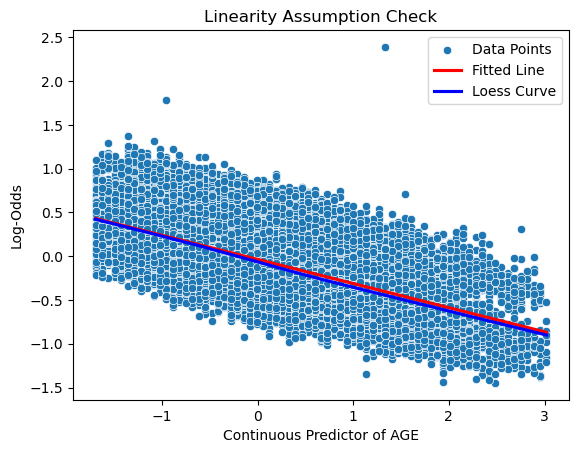

In [119]:
# Calculate predicted probabilities and log-odds
predicted_probs = logit_result.predict_proba(x_train_logit)[:, 1]
log_odds = np.log(predicted_probs / (1 - predicted_probs))

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'Continuous Predictor': x_train_logit['AGE'],
                          'Log-Odds': log_odds})

# Scatterplot with loess curve and fitted line
sns.scatterplot(x='Continuous Predictor', y='Log-Odds', data=plot_data, label='Data Points')
sns.regplot(x='Continuous Predictor', y='Log-Odds', data=plot_data, scatter=False, label='Fitted Line', color='red', order=1)
sns.regplot(x='Continuous Predictor', y='Log-Odds', data=plot_data, scatter=False, lowess=True, label='Loess Curve', color='blue')

# Customize the plot
plt.title('Linearity Assumption Check')
plt.xlabel('Continuous Predictor of AGE')
plt.ylabel('Log-Odds')
plt.legend()
plt.show()

### Fitting New Model

In [120]:
# Get the column names
column_names_logit = x_train_logit.columns.tolist()

# Print or use the column names as needed
print(column_names_logit)

['PAYMENT_DAY', 'QUANT_DEPENDANTS', 'MONTHS_IN_RESIDENCE', 'PERSONAL_MONTHLY_INCOME', 'OTHER_INCOMES', 'QUANT_CARS', 'AGE', 'POSTAL_ADDRESS_TYPE', 'FLAG_EMAIL', 'FLAG_VISA', 'FLAG_MASTERCARD', 'FLAG_DINERS', 'FLAG_AMERICAN_EXPRESS', 'MARITAL_STATUS', 'FLAG_RESIDENCIAL_PHONE_Y', 'COMPANY_Y', 'FLAG_PROFESSIONAL_PHONE_Y', 'APPLICATION_SUBMISSION_TYPE_Unknown', 'APPLICATION_SUBMISSION_TYPE_Web', 'RESIDENCIAL_REGION_North', 'RESIDENCIAL_REGION_Northeast', 'RESIDENCIAL_REGION_South', 'RESIDENCIAL_REGION_Southeast']


In [121]:
Logitmodel=LogisticRegression(penalty =None,
                  solver = 'newton-cholesky',
                 class_weight = 'balanced')

logit_result = Logitmodel.fit(x_train_logit,y_train_logit)

### Evaluation

### TRAIN SET

#### Running Time

In [122]:
start_time_logit = time.time()
Logitmodel.fit(x_train_logit,y_train_logit)
end_time_logit = time.time()
running_time = end_time_logit - start_time_logit

print(f"Running time: {running_time:.2f} seconds")

Running time: 0.11 seconds


#### Classification Table

In [123]:
y_pred_train_logit = Logitmodel.predict(x_train_logit)
print(classification_report(y_train_logit, y_pred_train_logit,digits = 4))

              precision    recall  f1-score   support

           0     0.7972    0.5542    0.6539     25832
           1     0.3215    0.5996    0.4186      9099

    accuracy                         0.5661     34931
   macro avg     0.5593    0.5769    0.5362     34931
weighted avg     0.6733    0.5661    0.5926     34931



In [124]:
# Assuming y_true and y_pred are your true labels and predicted labels
balanced_acc_logit_train = balanced_accuracy_score(y_train_logit, y_pred_train_logit)
print(f'Balanced Accuracy Score: {balanced_acc_logit_train}')

Balanced Accuracy Score: 0.5769306949286488


### TEST SET

#### Classification Table

In [125]:
y_pred_test_logit = Logitmodel.predict(x_test_logit)
print(classification_report(y_test_logit, y_pred_test_logit, digits = 4))

              precision    recall  f1-score   support

           0     0.7962    0.5490    0.6499     11068
           1     0.3193    0.6010    0.4171      3897

    accuracy                         0.5625     14965
   macro avg     0.5578    0.5750    0.5335     14965
weighted avg     0.6720    0.5625    0.5892     14965



In [126]:
# Assuming y_true and y_pred are your true labels and predicted labels
balanced_acc_logit_test = balanced_accuracy_score(y_test_logit, y_pred_test_logit)
print(f'Balanced Accuracy Score: {balanced_acc_logit_test}')

Balanced Accuracy Score: 0.5749725563361361


#### Confusion Matrix - False Positive Rate

In [127]:
confusion_matrix_logit = confusion_matrix(y_test_logit, y_pred_test_logit)
confusion_matrix_logit

array([[6076, 4992],
       [1555, 2342]])

In [128]:
# Get values from our confusion_matrix function using ravel()

TP,FP,FN,TN = confusion_matrix(y_pred_test_logit, y_test_logit).ravel()

def calculate_accuracy(TP,FP,FN,TN):
    acc = 0    
    acc = (TP+TN)/(TP+FP+FN+TN)
    return acc
    
def calculate_recall(TP,FP,FN,TN):
    recall = 0    
    recall = (TP)/(TP+FN)      
    return recall
    
def calculate_specificity(TP,FP,FN,TN):   
    spec = 0
    spec = (TN)/(TN+FP)     
    return spec 

def calculate_precision(TP,FP,FN,TN):
    prec = 0    
    prec = (TP)/(TP+FP)     
    return prec 

print('Accuracy '+str(calculate_accuracy(TP,FP,FN,TN)))
print('Recall '+str(calculate_recall(TP,FP,FN,TN)))
print('Precision '+str(calculate_precision(TP,FP,FN,TN)))
print('Specificity '+str(calculate_specificity(TP,FP,FN,TN)))

Accuracy 0.5625125292348814
Recall 0.5489700036140224
Precision 0.796225920587079
Specificity 0.6009751090582499


In [129]:
# Calculate False Positives (FP) and True Negatives (TN)
false_positives_logit = confusion_matrix_logit[0, 1]
true_negatives_logit = confusion_matrix_logit[0, 0]

# Calculate False Positive Rate (FPR)
false_positive_rate_logit = false_positives_logit / (false_positives_logit + true_negatives_logit)

print(f"False Positive Rate: {false_positive_rate_logit:.4f}")

False Positive Rate: 0.4510


#### ROC Curve

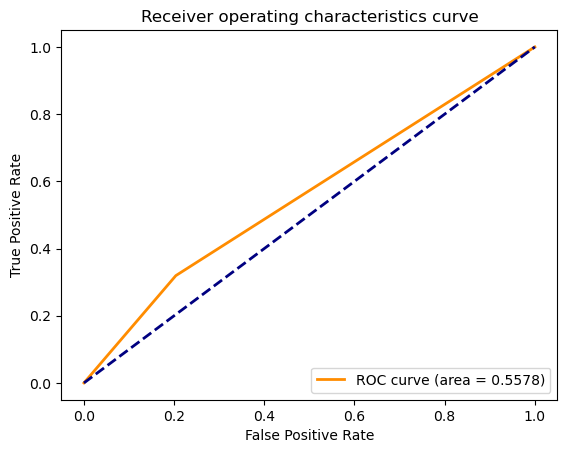

In [130]:
# Compute Receiver operating characteristic (ROC)
fpr, tpr, thresholds = roc(y_pred_test_logit, y_test_logit)

# Compute Area Under the Curve (AUC) using the trapezoidal rule.
# This is a general function, given points on a curve. For computing the area under the ROC-curve, see roc_auc_score.
# For an alternative way to summarize a precision-recall curve, see average_precision_score.
roc_auc = auc(fpr,tpr)


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver operating characteristics curve')
plt.legend(loc="lower right")
plt.show()

#### Feature Importance

In [131]:
predictor_names = ['PAYMENT_DAY', 'QUANT_DEPENDANTS', 'MONTHS_IN_RESIDENCE', 'PERSONAL_MONTHLY_INCOME', 'OTHER_INCOMES', 'QUANT_CARS', 'AGE', 'POSTAL_ADDRESS_TYPE', 'FLAG_EMAIL', 'FLAG_VISA', 'FLAG_MASTERCARD', 'FLAG_DINERS', 'FLAG_AMERICAN_EXPRESS', 'MARITAL_STATUS', 'FLAG_RESIDENCIAL_PHONE_Y', 'COMPANY_Y', 'FLAG_PROFESSIONAL_PHONE_Y', 'APPLICATION_SUBMISSION_TYPE_Unknown', 'APPLICATION_SUBMISSION_TYPE_Web', 'RESIDENCIAL_REGION_North', 'RESIDENCIAL_REGION_Northeast', 'RESIDENCIAL_REGION_South', 'RESIDENCIAL_REGION_Southeast']

# Get the coefficients from the logistic regression model
coefficients = Logitmodel.coef_

# Create a new DataFrame
coefficients_df = pd.DataFrame(coefficients, columns=predictor_names)

# Transpose the DataFrame for better readability
coefficients_df = coefficients_df.transpose().reset_index()
coefficients_df.columns = ['Predictor', 'Coefficient']

# Print or use the new DataFrame as needed
print(coefficients_df)

                              Predictor  Coefficient
0                           PAYMENT_DAY     0.097757
1                      QUANT_DEPENDANTS     0.030246
2                   MONTHS_IN_RESIDENCE    -0.004316
3               PERSONAL_MONTHLY_INCOME     0.014990
4                         OTHER_INCOMES     0.013364
5                            QUANT_CARS     0.087133
6                                   AGE    -0.322115
7                   POSTAL_ADDRESS_TYPE    -0.089558
8                            FLAG_EMAIL    -0.042259
9                             FLAG_VISA     0.066372
10                      FLAG_MASTERCARD    -0.187612
11                          FLAG_DINERS     0.141014
12                FLAG_AMERICAN_EXPRESS    -0.067396
13                       MARITAL_STATUS    -0.012475
14             FLAG_RESIDENCIAL_PHONE_Y    -0.602096
15                            COMPANY_Y    -0.063318
16            FLAG_PROFESSIONAL_PHONE_Y    -0.107413
17  APPLICATION_SUBMISSION_TYPE_Unknown     0.

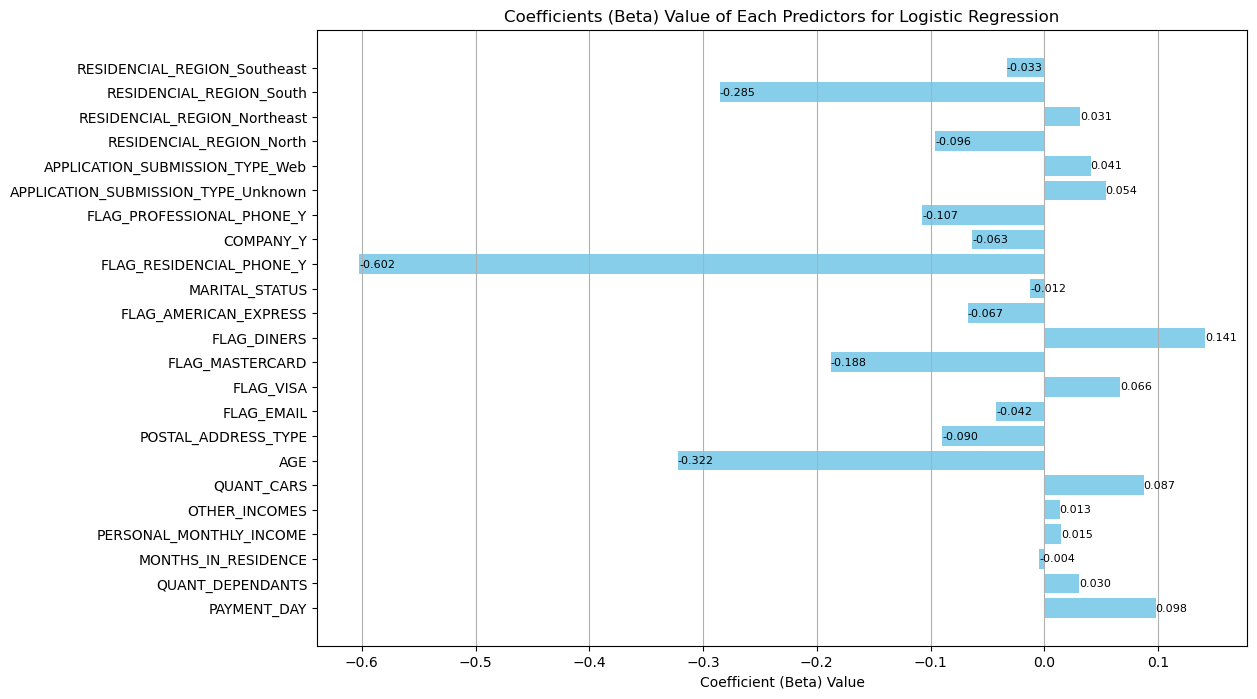

In [132]:
# Plotting
plt.figure(figsize=(12, 8))
bars = plt.barh(coefficients_df['Predictor'], coefficients_df['Coefficient'], color='skyblue')

# Add labels to each bar
for bar, label in zip(bars, coefficients_df['Coefficient']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{label:.3f}', 
             va='center', ha='left', fontsize=8, color='black')
    
plt.xlabel('Coefficient (Beta) Value')
plt.title('Coefficients (Beta) Value of Each Predictors for Logistic Regression')
plt.grid(axis='x')
plt.show()

# RANDOM FOREST

In [133]:
# Get the column names
column_names = x_train.columns.tolist()

# Print or use the column names as needed
print(column_names)

['PAYMENT_DAY', 'QUANT_DEPENDANTS', 'MONTHS_IN_RESIDENCE', 'PERSONAL_MONTHLY_INCOME', 'OTHER_INCOMES', 'QUANT_BANKING_ACCOUNTS', 'QUANT_CARS', 'AGE', 'POSTAL_ADDRESS_TYPE', 'FLAG_EMAIL', 'FLAG_VISA', 'FLAG_MASTERCARD', 'FLAG_DINERS', 'FLAG_AMERICAN_EXPRESS', 'MARITAL_STATUS', 'FLAG_RESIDENCIAL_PHONE_Y', 'COMPANY_Y', 'FLAG_PROFESSIONAL_PHONE_Y', 'APPLICATION_SUBMISSION_TYPE_Unknown', 'APPLICATION_SUBMISSION_TYPE_Web', 'RESIDENCIAL_REGION_North', 'RESIDENCIAL_REGION_Northeast', 'RESIDENCIAL_REGION_South', 'RESIDENCIAL_REGION_Southeast']


### Random Search

- n_estimators - It defines the number of decision trees to be created in a random forest.- Generally, a higher number makes the predictions stronger and more stable, but a very large number can result in higher training time.

- min_samples_leaf - The minimum number of samples required to be at a leaf node.

- max_features - The number of features to consider when looking for the best split:

- max_depth - The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

- class_weight - The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)) / The “balanced_subsample” mode is the same as “balanced” except that weights are computed based on the bootstrap sample for every tree grown.

- min_samples_split - The minimum number of samples required to split an internal node:

- bootstrap - Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.

### Tuning and fitting Model

In [134]:
parameters_ramdonforest={'n_estimators': np.arange(10,200),
                         'min_samples_leaf': [5,10,20,50,100],
                         'max_features': ['auto','sqrt', 'log2'],
                         'max_depth': [None,5, 10, 20,50,100],
                         'class_weight': ['balanced_subsample','balanced'],
                        'min_samples_split':[2,5,10,20],
                         'bootstrap':[True,False]
                        }

RandomForestmodel=RandomForestClassifier(criterion='gini',random_state=0)
ram_forest_cv_obj = RandomizedSearchCV(RandomForestmodel,parameters_ramdonforest,scoring='balanced_accuracy',cv=5,random_state=0,n_iter=50)

ram_forest_cv_obj.fit(x_train,y_train)
best_model_forest=ram_forest_cv_obj.best_params_
print(best_model_forest)

{'n_estimators': 143, 'min_samples_split': 20, 'min_samples_leaf': 50, 'max_features': 'log2', 'max_depth': 20, 'class_weight': 'balanced', 'bootstrap': True}


### Evaluation

### TRAIN SET

#### Running Time

In [135]:
rand_forest = RandomForestClassifier(criterion='gini',random_state=0,**best_model_forest)
start_time_forest = time.time()
rand_forest.fit(x_train,y_train)
end_time_forest = time.time()
running_time_forest = end_time_forest - start_time_forest

print(f"Running time: {running_time_forest:.2f} seconds")

Running time: 3.94 seconds


#### Classification Report

In [136]:
y_pred_train_forest = rand_forest.predict(x_train)
print(classification_report(y_train, y_pred_train_forest,digits=4))

              precision    recall  f1-score   support

           0     0.8445    0.6002    0.7017     25832
           1     0.3768    0.6862    0.4865      9099

    accuracy                         0.6226     34931
   macro avg     0.6107    0.6432    0.5941     34931
weighted avg     0.7227    0.6226    0.6456     34931



In [137]:
# Assuming y_true and y_pred are your true labels and predicted labels
balanced_acc_forest_train = balanced_accuracy_score(y_train, y_pred_train_forest)
print(f'Balanced Accuracy Score: {balanced_acc_forest_train}')

Balanced Accuracy Score: 0.6432268918398767


### TEST SET

#### Classification Report

In [138]:
y_pred_test_forest = rand_forest.predict(x_test)
print(classification_report(y_test, y_pred_test_forest,digits=4))

              precision    recall  f1-score   support

           0     0.8004    0.5660    0.6631     11068
           1     0.3271    0.5992    0.4232      3897

    accuracy                         0.5746     14965
   macro avg     0.5637    0.5826    0.5431     14965
weighted avg     0.6771    0.5746    0.6006     14965



In [139]:
# Assuming y_true and y_pred are your true labels and predicted labels
balanced_acc_forest_train = balanced_accuracy_score(y_test, y_pred_test_forest)
print(f'Balanced Accuracy Score: {balanced_acc_forest_train}')

Balanced Accuracy Score: 0.5825673822282651


#### Confusion Matrix

In [140]:
confusion_matrix_forest = confusion_matrix(y_test, y_pred_test_forest)
confusion_matrix_forest

array([[6264, 4804],
       [1562, 2335]])

In [141]:
# Get values from our confusion_matrix function using ravel()

TP,FP,FN,TN = confusion_matrix(y_pred_test_forest,y_test).ravel()

def calculate_accuracy(TP,FP,FN,TN):
    acc = 0    
    acc = (TP+TN)/(TP+FP+FN+TN)
    return acc
    
def calculate_recall(TP,FP,FN,TN):
    recall = 0    
    recall = (TP)/(TP+FN)      
    return recall
    
def calculate_specificity(TP,FP,FN,TN):   
    spec = 0
    spec = (TN)/(TN+FP)     
    return spec 

def calculate_precision(TP,FP,FN,TN):
    prec = 0    
    prec = (TP)/(TP+FP)     
    return prec 

print('Accuracy '+str(calculate_accuracy(TP,FP,FN,TN)))
print('Recall '+str(calculate_recall(TP,FP,FN,TN)))
print('Precision '+str(calculate_precision(TP,FP,FN,TN)))
print('Specificity '+str(calculate_specificity(TP,FP,FN,TN)))

Accuracy 0.5746074173070498
Recall 0.5659559089266354
Precision 0.8004088934321493
Specificity 0.5991788555298948


In [142]:
# Calculate False Positives (FP) and True Negatives (TN)
false_positives_forest = confusion_matrix_forest[0, 1]
true_negatives_forest = confusion_matrix_forest[0, 0]

# Calculate False Positive Rate (FPR)
false_positive_rate_forest = false_positives_forest / (false_positives_forest + true_negatives_forest)

print(f"False Positive Rate: {false_positive_rate_forest:.4f}")

False Positive Rate: 0.4340


#### ROC Curve

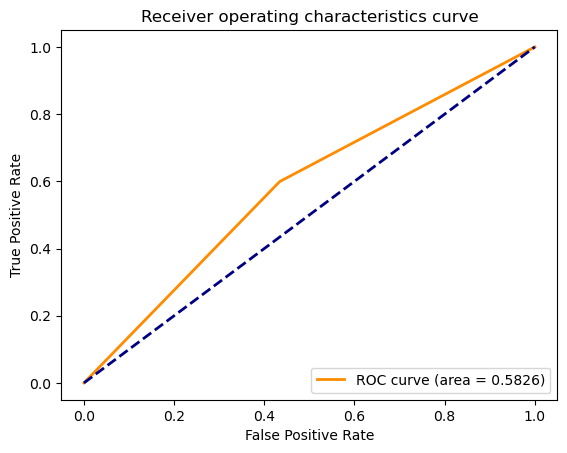

In [143]:
# Compute Receiver operating characteristic (ROC)
fpr_forest, tpr_forest, thresholds_forest = roc(y_test.values,y_pred_test_forest)

# Compute Area Under the Curve (AUC) using the trapezoidal rule.
# This is a general function, given points on a curve. For computing the area under the ROC-curve, see roc_auc_score.
# For an alternative way to summarize a precision-recall curve, see average_precision_score.
roc_auc_forest = auc(fpr_forest, tpr_forest)


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr_forest, tpr_forest, color='darkorange',
         lw=2, label='ROC curve (area = %0.4f)' % roc_auc_forest)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver operating characteristics curve')
plt.legend(loc="lower right")
plt.show()

#### Feature Importance

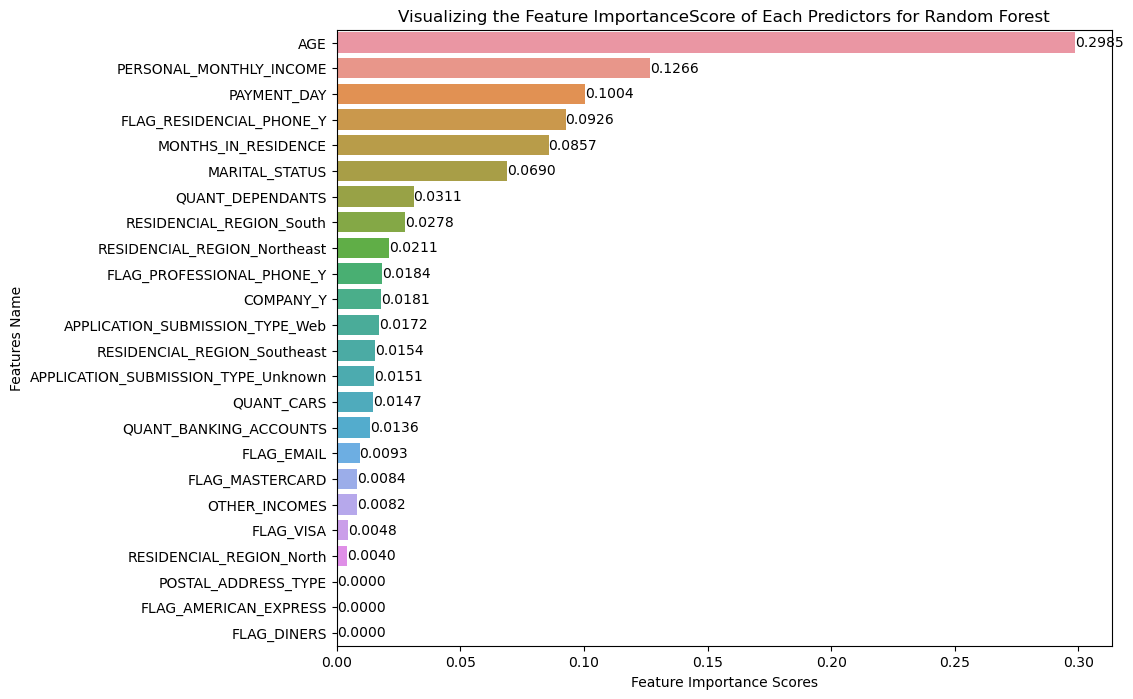

In [144]:
feature_scores = pd.Series(rand_forest.feature_importances_, index=x_train.columns).sort_values(ascending=False)
most_important = feature_scores.iloc[:30]

# Plotting
plt.figure(figsize=(10, 8))
ax = sns.barplot(x=most_important, y=most_important.index)

# Add labels to each bar
for index, value in enumerate(most_important):
    ax.text(value, index, f'{value:.4f}', ha='left', va='center', fontsize=10)

plt.xlabel('Feature Importance Scores')
plt.ylabel('Features Name')
plt.title("Visualizing the Feature ImportanceScore of Each Predictors for Random Forest")
plt.show()